In [11]:
from pylsl import StreamInlet, resolve_stream
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq

In [12]:
import scipy.signal as sig
from scipy import fft
from scipy import stats

from sklearn.decomposition import FastICA, PCA

In [13]:
channels = 8 # for this dataset
# sample rate and lower and upper bounds
fs = 250.0
lowcut = 5.0
highcut = 40.0
order = 4

# Receive chunks in real time

starting
[[60021.4296875, 48157.859375, -18039.849609375, -26607.669921875, -7183.52001953125, -16772.2109375, -4528.02001953125, -6100.43994140625]]
[[59757.87890625, 47757.62890625, -17909.130859375, -26564.619140625, -6971.10986328125, -16539.7109375, -4297.89990234375, -5882.60009765625], [59597.3203125, 47619.44921875, -17854.73046875, -26441.640625, -6947.81982421875, -16531.099609375, -4257.02001953125, -5813.43994140625], [59842.8203125, 47978.109375, -17985.150390625, -26501.58984375, -7155.490234375, -16735.0, -4480.33984375, -6015.97021484375], [60047.0703125, 48190.73828125, -18030.91015625, -26581.720703125, -7202.47021484375, -16766.869140625, -4537.14013671875, -6078.3798828125], [59865.87890625, 47879.98046875, -17910.5, -26561.400390625, -6999.81005859375, -16545.810546875, -4328.66015625, -5887.2001953125], [59636.19921875, 47623.58984375, -17811.630859375, -26426.619140625, -6912.080078125, -16492.029296875, -4237.0400390625, -5794.97998046875], [59811.69921875, 4792

[[59998.71875, 48143.23828125, -18055.580078125, -26632.0390625, -7253.97021484375, -16823.98046875, -4584.02978515625, -6082.47021484375], [59809.640625, 47825.9609375, -17921.869140625, -26593.3203125, -7032.06005859375, -16584.009765625, -4354.5, -5876.08984375], [59596.75, 47594.5703125, -17821.830078125, -26449.19921875, -6939.56982421875, -16525.69921875, -4249.89013671875, -5783.64990234375], [59800.87890625, 47913.78125, -17949.66015625, -26490.080078125, -7143.7998046875, -16738.009765625, -4460.830078125, -5985.47998046875], [60025.6796875, 48173.890625, -18042.009765625, -26593.5, -7248.68994140625, -16825.69921875, -4569.72021484375, -6096.72998046875], [59868.76953125, 47909.26953125, -17971.029296875, -26614.8203125, -7099.7900390625, -16639.240234375, -4410.8701171875, -5945.85009765625], [59616.9296875, 47601.51953125, -17821.869140625, -26455.119140625, -6935.1201171875, -16490.44921875, -4235.2099609375, -5772.2001953125], [59749.46875, 47854.03125, -17934.73046875, -

[[60001.16015625, 48138.4609375, -18064.66015625, -26631.5, -7291.2998046875, -16847.849609375, -4603.14013671875, -6103.89990234375], [59846.87890625, 47867.23828125, -17962.619140625, -26639.5703125, -7110.919921875, -16645.5, -4410.0400390625, -5923.4599609375], [59578.421875, 47547.4609375, -17841.830078125, -26508.4296875, -6977.75, -16536.240234375, -4264.93994140625, -5782.330078125], [59716.58984375, 47805.37109375, -17960.26953125, -26533.419921875, -7179.509765625, -16749.259765625, -4477.60986328125, -5978.39990234375], [59989.1796875, 48133.6484375, -18053.7109375, -26629.380859375, -7295.41015625, -16860.05078125, -4608.52978515625, -6108.259765625], [59907.30078125, 47951.66015625, -17989.669921875, -26660.73046875, -7158.2998046875, -16696.099609375, -4465.25, -5981.58984375], [59617.640625, 47576.62890625, -17826.05078125, -26519.720703125, -6954.75, -16510.140625, -4250.009765625, -5776.85009765625], [59690.890625, 47753.41015625, -17910.05078125, -26503.509765625, -71

[[59944.140625, 48094.5390625, -18091.51953125, -26632.060546875, -7358.5498046875, -16883.810546875, -4676.9501953125, -6133.33984375], [59873.23046875, 47924.01953125, -18004.400390625, -26643.279296875, -7201.97998046875, -16696.259765625, -4513.02001953125, -5979.6298828125], [59575.19921875, 47539.1015625, -17854.080078125, -26508.5390625, -7012.43994140625, -16526.41015625, -4312.2099609375, -5790.580078125], [59635.5703125, 47704.19140625, -17951.740234375, -26509.8203125, -7189.3701171875, -16728.689453125, -4495.72021484375, -5958.89013671875], [59921.921875, 48070.23828125, -18061.30078125, -26604.970703125, -7344.3798828125, -16876.30078125, -4666.5498046875, -6123.35009765625], [59881.94921875, 47956.37890625, -18049.609375, -26678.75, -7271.6298828125, -16782.08984375, -4588.77001953125, -6064.31982421875], [59593.19140625, 47560.44140625, -17885.349609375, -26561.5390625, -7048.81982421875, -16567.5390625, -4352.419921875, -5843.14990234375], [59622.46875, 47670.48046875,

[[59895.140625, 48048.0703125, -18078.359375, -26628.2109375, -7378.81982421875, -16887.439453125, -4683.6298828125, -6133.22998046875], [59832.91015625, 47903.71875, -18071.23046875, -26707.669921875, -7304.169921875, -16785.8203125, -4597.77978515625, -6054.509765625], [59545.69140625, 47507.01953125, -17915.8203125, -26596.919921875, -7086.2001953125, -16578.419921875, -4367.8701171875, -5837.97998046875], [59571.91015625, 47618.51171875, -17951.310546875, -26531.94921875, -7191.85009765625, -16717.830078125, -4479.16015625, -5936.9599609375], [59846.5, 47990.46875, -18074.419921875, -26616.3203125, -7364.830078125, -16879.5, -4663.0, -6109.0400390625], [59877.28125, 47969.75, -18071.630859375, -26683.890625, -7316.8701171875, -16803.390625, -4613.3798828125, -6063.72021484375], [59601.1484375, 47571.23828125, -17917.919921875, -26598.439453125, -7092.72021484375, -16576.099609375, -4384.830078125, -5846.43017578125], [59524.19140625, 47558.1796875, -17932.849609375, -26520.08007812

[[59836.01953125, 48009.87109375, -18086.119140625, -26613.76953125, -7418.2998046875, -16904.330078125, -4731.14990234375, -6135.490234375], [59875.87890625, 47985.640625, -18080.4609375, -26680.580078125, -7359.89013671875, -16827.689453125, -4666.1298828125, -6085.419921875], [59586.94921875, 47572.62890625, -17917.689453125, -26581.23046875, -7121.419921875, -16582.330078125, -4409.7998046875, -5840.35009765625], [59507.1796875, 47569.44921875, -17922.41015625, -26491.599609375, -7179.919921875, -16672.51953125, -4463.97998046875, -5881.4599609375], [59759.578125, 47920.8203125, -18086.939453125, -26603.5390625, -7403.60986328125, -16893.849609375, -4700.0400390625, -6107.97021484375], [59820.6015625, 47962.890625, -18133.94921875, -26714.5390625, -7421.8701171875, -16896.890625, -4717.2001953125, -6136.39990234375], [59577.41015625, 47589.12109375, -17985.0390625, -26649.220703125, -7188.81005859375, -16650.4609375, -4471.490234375, -5909.0], [59455.1015625, 47489.8984375, -17952.

[[59772.0703125, 47961.41015625, -18076.970703125, -26599.19921875, -7434.2099609375, -16914.7890625, -4735.4599609375, -6140.52001953125], [59826.3203125, 47984.75, -18138.48046875, -26718.16015625, -7464.830078125, -16916.0390625, -4765.91015625, -6166.490234375], [59556.3984375, 47596.16015625, -17992.130859375, -26653.19921875, -7239.89013671875, -16664.990234375, -4533.35986328125, -5929.740234375], [59433.78125, 47505.75, -17954.80078125, -26540.4609375, -7241.830078125, -16704.9296875, -4531.259765625, -5918.5], [59681.66015625, 47867.23828125, -18101.650390625, -26616.41015625, -7450.60009765625, -16916.740234375, -4741.39013671875, -6121.85009765625], [59838.5, 48022.73828125, -18141.83984375, -26704.5390625, -7480.66015625, -16935.630859375, -4775.72021484375, -6164.16015625], [59652.2890625, 47703.8515625, -17988.0390625, -26645.830078125, -7239.39013671875, -16675.560546875, -4520.3701171875, -5928.89013671875], [59443.96875, 47501.4609375, -17904.240234375, -26503.38085937

[[60045.01171875, 48205.55859375, -18006.7890625, -26549.0, -7464.18994140625, -16915.580078125, -4771.4501953125, -6140.5400390625], [60195.28125, 48354.359375, -18053.4609375, -26639.94921875, -7493.8701171875, -16924.720703125, -4801.89013671875, -6175.41015625], [59986.55859375, 48017.6015625, -17906.5390625, -26590.66015625, -7257.5400390625, -16676.349609375, -4555.14990234375, -5948.0], [59796.05078125, 47829.69140625, -17834.369140625, -26469.19921875, -7206.85009765625, -16662.599609375, -4499.41015625, -5894.10986328125], [60017.140625, 48161.05078125, -17965.259765625, -26523.5390625, -7411.259765625, -16874.9609375, -4718.39013671875, -6094.02001953125], [60227.87109375, 48392.75, -18032.98046875, -26614.7109375, -7480.77001953125, -16929.05078125, -4791.5, -6168.10009765625], [60063.87890625, 48107.5, -17926.23046875, -26604.919921875, -7287.759765625, -16713.939453125, -4587.919921875, -5982.0], [59813.578125, 47816.48046875, -17816.599609375, -26470.880859375, -7173.0498

[[60074.359375, 48160.76953125, -17994.16015625, -26547.189453125, -7471.47021484375, -16913.359375, -4758.3701171875, -6099.10009765625]]
[[60269.44140625, 48375.71875, -18058.890625, -26637.619140625, -7540.7900390625, -16967.970703125, -4833.85009765625, -6176.02978515625], [60090.71875, 48074.12890625, -17960.7890625, -26637.380859375, -7360.0, -16762.98046875, -4644.39990234375, -5999.52001953125], [59853.48046875, 47800.51953125, -17844.650390625, -26495.380859375, -7240.0, -16670.2890625, -4514.85009765625, -5871.22021484375], [60029.4296875, 48095.3203125, -17958.380859375, -26519.16015625, -7429.5400390625, -16873.939453125, -4718.35986328125, -6059.0400390625], [60268.26171875, 48386.55859375, -18055.869140625, -26623.6796875, -7546.8701171875, -16980.529296875, -4845.10009765625, -6183.9501953125], [60143.94140625, 48157.01171875, -17986.0390625, -26648.080078125, -7399.52001953125, -16802.2109375, -4685.97998046875, -6034.72998046875], [59852.2890625, 47795.87890625, -17850

[[59985.83984375, 48084.41015625, -17986.380859375, -26543.970703125, -7493.39990234375, -16905.5390625, -4772.9501953125, -6096.3701171875], [60202.98828125, 48354.4609375, -18098.119140625, -26661.849609375, -7624.3798828125, -17021.76953125, -4911.419921875, -6234.56982421875], [60090.37890625, 48136.7109375, -18009.01953125, -26669.630859375, -7458.22021484375, -16823.759765625, -4736.16015625, -6067.5400390625], [59800.58984375, 47772.671875, -17882.44921875, -26546.119140625, -7304.72998046875, -16691.41015625, -4571.06982421875, -5905.97998046875], [59933.609375, 48010.23046875, -17962.19921875, -26527.41015625, -7460.14013671875, -16867.5390625, -4738.81982421875, -6057.259765625], [60209.6484375, 48354.8515625, -18063.119140625, -26616.009765625, -7591.35009765625, -16992.509765625, -4874.669921875, -6195.2099609375], [60148.859375, 48208.640625, -18023.369140625, -26666.23046875, -7483.5, -16860.279296875, -4757.990234375, -6095.16015625], [59858.171875, 47819.12109375, -1786

[[59904.1015625, 47984.859375, -17972.859375, -26523.849609375, -7499.58984375, -16898.7890625, -4764.58984375, -6072.89990234375], [60163.921875, 48311.62109375, -18081.0390625, -26620.810546875, -7639.509765625, -17024.119140625, -4914.75, -6212.7998046875], [60084.3203125, 48144.9609375, -18050.890625, -26679.669921875, -7542.39013671875, -16898.76953125, -4810.5, -6118.27978515625], [59799.48046875, 47770.53125, -17890.830078125, -26550.380859375, -7337.33984375, -16703.69921875, -4593.56982421875, -5910.580078125], [59870.05859375, 47936.80078125, -17932.830078125, -26493.990234375, -7452.43017578125, -16850.220703125, -4716.330078125, -6021.10986328125], [60151.44921875, 48300.66015625, -18049.369140625, -26583.529296875, -7617.08984375, -17005.1796875, -4894.27001953125, -6192.64013671875], [60132.0703125, 48218.5703125, -18058.91015625, -26670.48046875, -7578.0498046875, -16937.619140625, -4853.2099609375, -6161.91015625], [59851.80078125, 47826.19921875, -17892.7109375, -26562

[[59786.87109375, 47872.921875, -17984.48046875, -26528.94921875, -7552.58984375, -16912.779296875, -4812.330078125, -6086.77978515625], [60061.66015625, 48225.46875, -18100.19921875, -26619.51953125, -7710.169921875, -17060.83984375, -4981.60009765625, -6249.56982421875], [60071.1796875, 48168.8984375, -18066.890625, -26662.75, -7617.68017578125, -16941.66015625, -4876.58984375, -6154.77978515625], [59792.390625, 47781.609375, -17899.099609375, -26544.55078125, -7382.64990234375, -16708.060546875, -4622.93994140625, -5912.83984375], [59793.94921875, 47855.171875, -17911.66015625, -26461.580078125, -7461.7900390625, -16822.970703125, -4710.2099609375, -5990.2001953125], [60055.73828125, 48214.80859375, -18059.220703125, -26565.16015625, -7662.35986328125, -17017.51953125, -4926.009765625, -6195.66015625], [60101.78125, 48223.5703125, -18087.630859375, -26656.490234375, -7649.91015625, -16978.939453125, -4908.2900390625, -6184.81982421875], [59843.01953125, 47843.96875, -17931.419921875

[[59638.5390625, 47699.5390625, -17974.560546875, -26544.859375, -7523.3701171875, -16882.919921875, -4744.97998046875, -6026.0498046875]]
[[59922.0703125, 48074.8203125, -18110.4296875, -26635.83984375, -7714.3701171875, -17063.5, -4942.509765625, -6210.009765625], [59980.4296875, 48086.73828125, -18127.08984375, -26718.25, -7687.080078125, -17015.150390625, -4910.5, -6185.259765625], [59712.5, 47697.0390625, -17961.5, -26627.990234375, -7444.990234375, -16765.75, -4658.14990234375, -5946.93017578125], [59621.08984375, 47656.9296875, -17941.369140625, -26525.529296875, -7481.83984375, -16838.369140625, -4698.43017578125, -5974.64013671875], [59906.51953125, 48055.21875, -18068.990234375, -26595.869140625, -7678.31982421875, -17032.009765625, -4915.419921875, -6174.3798828125], [60047.98046875, 48182.6484375, -18100.640625, -26671.8203125, -7687.58984375, -17015.55078125, -4918.68017578125, -6177.7099609375], [59800.390625, 47808.83984375, -17973.419921875, -26630.98046875, -7473.70996

[[59928.0, 48102.5390625, -18049.169921875, -26583.169921875, -7690.4501953125, -17037.619140625, -4941.0498046875, -6179.009765625], [60073.75, 48254.6015625, -18127.580078125, -26694.619140625, -7759.009765625, -17079.859375, -5012.8701171875, -6243.8701171875], [59871.51953125, 47926.80859375, -17998.830078125, -26656.599609375, -7536.3798828125, -16838.279296875, -4771.2001953125, -6021.35986328125], [59673.96875, 47719.12109375, -17892.83984375, -26507.560546875, -7440.490234375, -16780.150390625, -4663.93994140625, -5919.5498046875], [59873.640625, 48036.0, -18024.419921875, -26559.439453125, -7650.68994140625, -17000.330078125, -4888.259765625, -6128.580078125], [60077.890625, 48276.44140625, -18123.779296875, -26674.529296875, -7758.39990234375, -17095.169921875, -5005.35986328125, -6245.58984375], [59932.578125, 48013.2890625, -18028.44921875, -26672.25, -7575.31982421875, -16885.470703125, -4815.85986328125, -6067.97998046875], [59699.03125, 47725.05859375, -17880.33984375, -

[[60058.62109375, 48251.73828125, -18129.4609375, -26658.66015625, -7768.66015625, -17093.25, -5020.4501953125, -6239.97998046875], [59932.328125, 48029.890625, -18059.33984375, -26681.189453125, -7617.97021484375, -16917.51953125, -4861.35009765625, -6096.259765625], [59632.21875, 47659.6796875, -17936.08984375, -26568.7109375, -7463.93994140625, -16786.880859375, -4697.580078125, -5940.0400390625], [59751.7109375, 47882.1484375, -18019.599609375, -26560.619140625, -7625.2099609375, -16970.740234375, -4871.0498046875, -6095.25], [60019.05859375, 48222.16015625, -18133.900390625, -26659.859375, -7777.22021484375, -17108.919921875, -5034.419921875, -6250.1298828125], [59957.96875, 48082.46875, -18113.08984375, -26721.91015625, -7695.080078125, -16997.880859375, -4944.830078125, -6174.60009765625], [59682.69140625, 47706.4609375, -17942.880859375, -26588.740234375, -7469.52978515625, -16782.830078125, -4709.9599609375, -5951.509765625], [59706.51953125, 47817.3515625, -18003.58984375, -2

[[59976.71875, 48124.2890625, -18125.48046875, -26696.650390625, -7738.669921875, -17047.58984375, -4990.2900390625, -6201.9599609375], [59691.609375, 47731.4609375, -17964.6796875, -26589.5, -7508.22021484375, -16818.48046875, -4746.91015625, -5970.4599609375], [59652.328125, 47767.890625, -17996.240234375, -26531.58984375, -7608.240234375, -16954.740234375, -4852.81005859375, -6065.06005859375], [59912.421875, 48128.94140625, -18139.150390625, -26632.150390625, -7809.1201171875, -17146.08984375, -5067.8798828125, -6266.509765625], [59986.0703125, 48164.48046875, -18154.939453125, -26709.509765625, -7783.259765625, -17092.580078125, -5030.83984375, -6233.22998046875], [59727.7890625, 47779.19921875, -17995.810546875, -26626.5390625, -7541.080078125, -16841.859375, -4768.830078125, -5988.81005859375], [59606.78125, 47698.890625, -17990.900390625, -26546.41015625, -7584.47998046875, -16922.2109375, -4809.47021484375, -6022.830078125], [59874.640625, 48076.140625, -18115.869140625, -2661

[[59682.53125, 47750.0703125, -18018.94921875, -26665.140625, -7589.10986328125, -16878.08984375, -4828.580078125, -6035.06005859375], [59515.1796875, 47601.8203125, -17978.509765625, -26561.05078125, -7583.02978515625, -16906.66015625, -4820.18017578125, -6019.43994140625], [59754.5, 47957.01171875, -18102.740234375, -26617.48046875, -7777.64990234375, -17099.2890625, -5028.60986328125, -6207.009765625], [59901.9609375, 48112.05859375, -18183.41015625, -26727.51953125, -7848.97021484375, -17153.580078125, -5100.14990234375, -6282.06982421875], [59692.01171875, 47774.171875, -18074.400390625, -26709.94921875, -7648.18994140625, -16933.55078125, -4889.669921875, -6090.3798828125], [59474.12109375, 47528.48046875, -17968.900390625, -26572.9609375, -7549.18994140625, -16863.6796875, -4780.009765625, -5977.330078125], [59653.46875, 47823.51953125, -18098.099609375, -26621.5703125, -7752.43017578125, -17076.169921875, -4995.64013671875, -6173.93017578125], [59864.58984375, 48072.921875, -18

[[59437.78125, 47500.87890625, -17976.009765625, -26598.400390625, -7562.08984375, -16880.859375, -4802.2099609375, -5994.68994140625], [59590.73046875, 47775.12890625, -18093.400390625, -26626.869140625, -7760.8798828125, -17098.439453125, -5010.56982421875, -6187.68017578125], [59835.328125, 48077.7109375, -18197.2890625, -26730.23046875, -7890.080078125, -17212.23046875, -5149.72998046875, -6317.85009765625], [59745.44921875, 47880.08984375, -18128.810546875, -26750.810546875, -7746.0400390625, -17035.580078125, -4997.39990234375, -6172.18994140625], [59460.73046875, 47512.96875, -17992.619140625, -26628.7890625, -7576.259765625, -16882.650390625, -4816.9599609375, -5996.7900390625], [59563.1484375, 47722.609375, -18064.609375, -26605.619140625, -7730.509765625, -17058.33984375, -4981.330078125, -6144.47021484375], [59836.578125, 48079.08984375, -18180.2109375, -26699.609375, -7886.0498046875, -17202.619140625, -5152.89990234375, -6309.31982421875], [59818.12109375, 47986.37890625, 

[[59556.80078125, 47722.48828125, -18071.970703125, -26631.48046875, -7755.81005859375, -17082.140625, -5005.10986328125, -6162.06005859375], [59834.62890625, 48091.5390625, -18189.630859375, -26716.6796875, -7918.330078125, -17234.890625, -5174.8798828125, -6328.490234375], [59847.19921875, 48044.46875, -18186.23046875, -26783.470703125, -7864.9501953125, -17152.080078125, -5117.9501953125, -6282.16015625], [59553.0, 47634.6484375, -18038.6796875, -26691.509765625, -7647.16015625, -16925.23046875, -4885.91015625, -6054.93017578125], [59517.390625, 47666.6796875, -18042.369140625, -26609.66015625, -7710.8798828125, -17025.05078125, -4949.27978515625, -6109.330078125], [59781.4609375, 48031.640625, -18178.140625, -26701.880859375, -7899.10986328125, -17204.740234375, -5145.58984375, -6287.83984375], [59864.8984375, 48080.8984375, -18198.05078125, -26783.919921875, -7885.25, -17171.150390625, -5128.8798828125, -6278.27001953125], [59584.62890625, 47677.390625, -18061.5703125, -26726.9199

[[59704.140625, 47945.94140625, -18185.26953125, -26709.48046875, -7923.419921875, -17206.390625, -5163.4501953125, -6293.7099609375], [59795.140625, 48027.44140625, -18246.529296875, -26817.529296875, -7958.85009765625, -17226.0390625, -5207.240234375, -6342.169921875], [59551.75, 47655.94921875, -18106.3203125, -26760.0, -7731.509765625, -16978.0703125, -4966.93994140625, -6115.1201171875], [59372.5390625, 47491.51171875, -18035.689453125, -26631.48046875, -7687.35009765625, -16970.830078125, -4919.93017578125, -6066.02001953125], [59586.37890625, 47823.2109375, -18164.609375, -26688.7890625, -7886.5, -17175.91015625, -5140.8798828125, -6272.2099609375], [59754.37109375, 48006.359375, -18238.8203125, -26788.5, -7955.25, -17226.470703125, -5207.31005859375, -6338.3701171875], [59548.55078125, 47684.19921875, -18128.759765625, -26767.439453125, -7756.89990234375, -16997.810546875, -4994.02978515625, -6135.43994140625], [59323.609375, 47430.671875, -18012.580078125, -26622.849609375, -7

[[59888.96875, 47912.5, -18218.58984375, -26751.619140625, -7980.8701171875, -17239.810546875, -5218.31005859375, -6331.3798828125]]
(8, 1841)


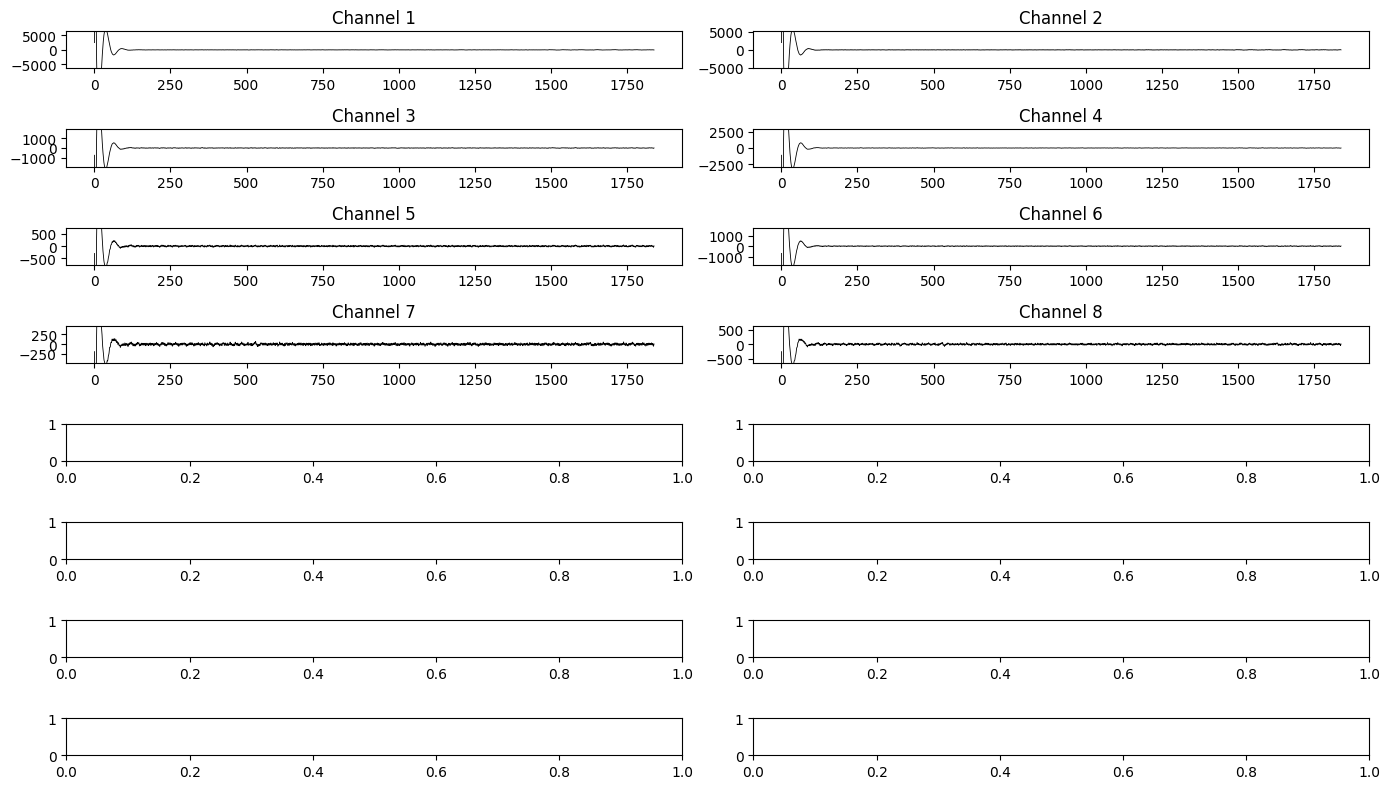

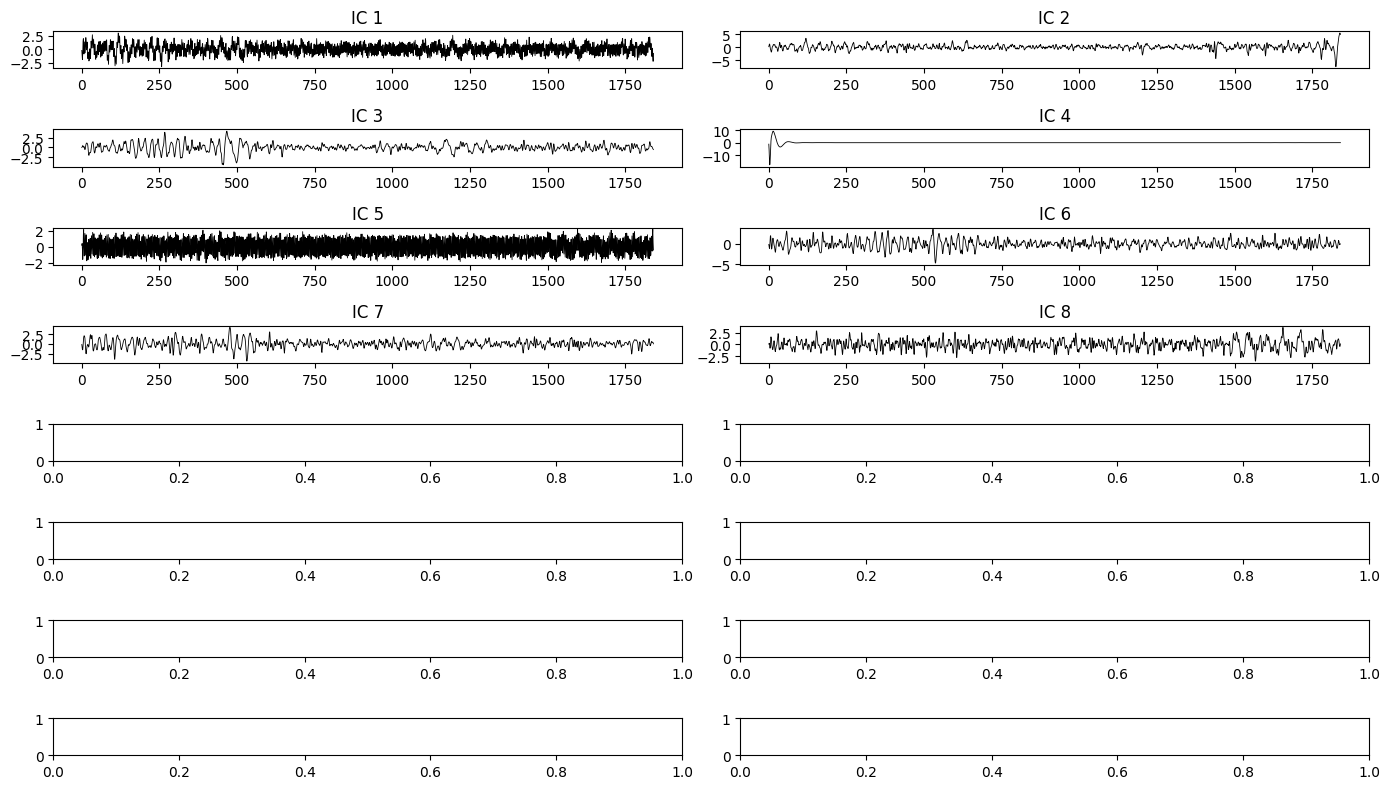

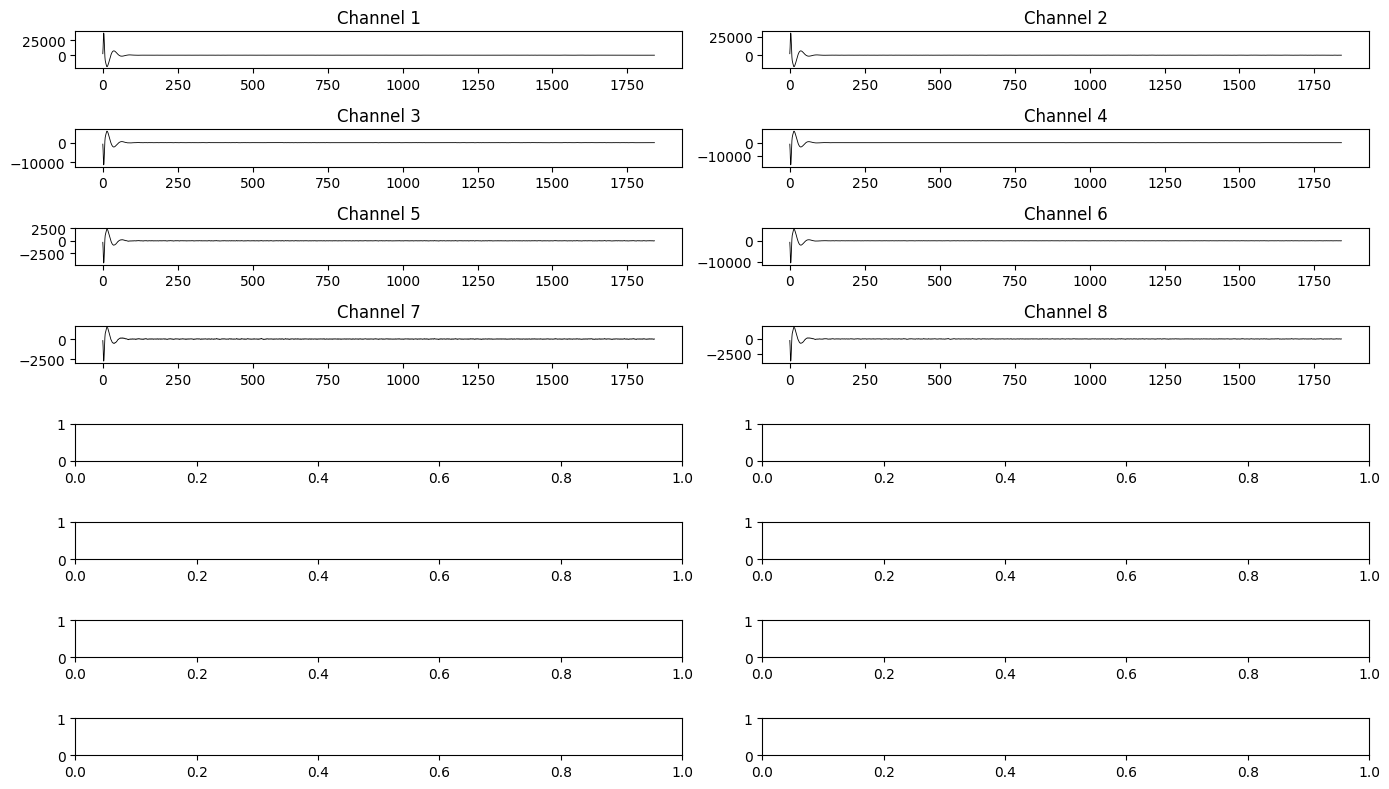

[[59740.76171875, 47647.7890625, -18130.30078125, -26756.1796875, -7809.7900390625, -17044.859375, -5038.02001953125, -6170.68994140625], [59485.58984375, 47342.80078125, -18002.0703125, -26619.5, -7668.02978515625, -16932.08984375, -4890.06982421875, -6026.2998046875], [59608.4609375, 47578.171875, -18123.55078125, -26655.73046875, -7870.43017578125, -17149.529296875, -5102.56982421875, -6217.93994140625], [59841.12109375, 47865.3203125, -18239.599609375, -26770.369140625, -8009.9501953125, -17276.509765625, -5249.330078125, -6361.1298828125], [59767.578125, 47693.28125, -18170.759765625, -26788.919921875, -7865.52978515625, -17095.98046875, -5093.5400390625, -6208.2900390625], [59498.91015625, 47339.37890625, -18011.30078125, -26649.470703125, -7664.72998046875, -16910.69921875, -4880.1201171875, -6005.72998046875], [59547.30078125, 47489.2109375, -18114.66015625, -26657.810546875, -7842.580078125, -17117.7890625, -5062.06982421875, -6175.60986328125], [59823.83984375, 47839.37109375

[[59184.5390625, 47293.5, -18437.7109375, -27036.830078125, -8809.849609375, -17952.26953125, -5615.830078125, -6359.33984375]]
[[58955.46875, 47034.2109375, -18350.650390625, -26905.890625, -8693.759765625, -17893.7109375, -5503.64990234375, -6248.4501953125], [59125.7890625, 47316.80859375, -18462.05078125, -26941.4296875, -8875.1796875, -18101.4296875, -5696.25, -6434.60009765625], [59344.44140625, 47578.66015625, -18561.98046875, -27049.94921875, -9003.5498046875, -18210.169921875, -5820.81982421875, -6560.72998046875], [59194.640625, 47323.5390625, -18522.529296875, -27096.48046875, -8885.4697265625, -18068.720703125, -5706.7998046875, -6459.10009765625], [58938.8203125, 47005.71875, -18375.640625, -26952.4296875, -8710.9697265625, -17909.01953125, -5518.2900390625, -6277.080078125], [59055.5, 47229.30078125, -18470.380859375, -26952.0390625, -8887.8603515625, -18097.130859375, -5693.18994140625, -6432.5], [59321.98046875, 47560.0390625, -18570.16015625, -27058.130859375, -9028.33

[[59021.3203125, 47092.98046875, -18323.869140625, -26886.1796875, -8802.51953125, -17984.029296875, -5506.06005859375, -6245.10009765625], [59070.05078125, 47238.19921875, -18403.689453125, -26887.0, -8951.490234375, -18194.69921875, -5667.10986328125, -6398.33984375], [59334.80078125, 47573.98828125, -18515.9609375, -26988.9296875, -9110.2802734375, -18346.470703125, -5843.66015625, -6570.14013671875], [59336.140625, 47506.4609375, -18483.640625, -27045.970703125, -9005.1796875, -18258.400390625, -5751.35009765625, -6492.08984375], [59054.46875, 47124.16015625, -18326.98046875, -26908.619140625, -8773.5498046875, -18003.58984375, -5519.25, -6261.509765625], [59037.5703125, 47184.5703125, -18368.130859375, -26852.380859375, -8878.490234375, -18156.390625, -5624.4599609375, -6351.0498046875], [59315.140625, 47550.4296875, -18506.8203125, -26962.55078125, -9084.0400390625, -18349.109375, -5826.14013671875, -6537.83984375], [59353.1796875, 47550.5390625, -18507.26953125, -27016.9609375, 

[[58748.37890625, 46947.16015625, -18610.75, -27431.650390625, -9092.490234375, -18569.609375, -5900.080078125, -6647.02978515625], [59034.8203125, 47270.69921875, -18745.939453125, -27055.419921875, -9380.16015625, -18284.98046875, -6067.60009765625, -6717.169921875], [59105.12109375, 47309.140625, -18977.55078125, -27489.16015625, -9297.2998046875, -18489.939453125, -6097.08984375, -6781.5400390625], [58833.75, 46984.5, -18990.470703125, -27292.640625, -8967.4501953125, -18033.05078125, -5768.52001953125, -6485.18017578125], [58804.578125, 46965.171875, -18733.91015625, -27130.94921875, -9059.2099609375, -18389.650390625, -5752.81982421875, -6485.5400390625], [59021.8984375, 47235.25, -18680.740234375, -27409.44921875, -9360.91015625, -18773.7890625, -6026.75, -6761.10986328125], [59157.08984375, 47448.76953125, -18712.41015625, -27283.51953125, -9560.98046875, -18558.5, -6122.85986328125, -6800.740234375], [59096.671875, 47214.12890625, -18596.7890625, -26828.109375, -9183.209960937

[[59059.859375, 47307.91015625, -18532.119140625, -27018.5390625, -9116.6298828125, -18327.0390625, -5847.02001953125, -6525.990234375], [59245.109375, 47511.78125, -18612.720703125, -27117.669921875, -9208.2001953125, -18392.849609375, -5930.60986328125, -6609.8798828125], [59092.0703125, 47250.8203125, -18522.599609375, -27096.66015625, -9017.740234375, -18166.890625, -5733.919921875, -6424.60986328125], [58851.48828125, 46973.6015625, -18441.9609375, -26989.7109375, -8915.3095703125, -18103.48046875, -5614.22021484375, -6316.6298828125], [59015.6015625, 47243.05078125, -18527.16015625, -27035.509765625, -9105.1396484375, -18312.109375, -5807.7900390625, -6493.759765625], [59219.6484375, 47494.80078125, -18651.970703125, -27127.779296875, -9239.7001953125, -18430.890625, -5963.830078125, -6641.240234375], [59122.51171875, 47300.76171875, -18579.73046875, -27144.5390625, -9098.1201171875, -18249.890625, -5816.68017578125, -6500.31005859375], [58871.2109375, 46981.2890625, -18400.26953

[[59273.1796875, 47582.9296875, -18550.810546875, -27016.259765625, -9468.240234375, -18428.009765625, -5968.0498046875, -6631.47021484375]]
[[59211.26953125, 47431.19921875, -18508.0, -27054.529296875, -9327.3203125, -18275.390625, -5841.759765625, -6515.97998046875], [58933.8984375, 47071.8984375, -18363.4296875, -26941.5390625, -9116.1796875, -18110.609375, -5622.509765625, -6314.10009765625], [58995.96875, 47225.01171875, -18411.220703125, -26897.5703125, -9237.330078125, -18283.55078125, -5754.93017578125, -6435.93994140625], [59252.0390625, 47560.83984375, -18536.099609375, -26997.380859375, -9397.3203125, -18448.189453125, -5933.919921875, -6599.259765625], [59241.8203125, 47490.390625, -18542.08984375, -27071.400390625, -9324.75, -18369.0, -5876.89990234375, -6542.669921875], [58965.87109375, 47108.0703125, -18394.23046875, -26968.990234375, -9091.48046875, -18151.919921875, -5650.0498046875, -6323.97998046875], [58930.109375, 47140.4296875, -18421.7890625, -26911.66015625, -91

[[59148.73046875, 47426.55078125, -18664.130859375, -27207.119140625, -9268.2197265625, -18426.130859375, -5966.93017578125, -6614.39990234375]]
[[58878.69921875, 47040.5390625, -18534.5390625, -27136.4296875, -9045.259765625, -18193.9609375, -5725.330078125, -6385.830078125], [58812.8203125, 47027.0390625, -18511.939453125, -27029.19921875, -9082.3798828125, -18262.0, -5753.7001953125, -6404.0], [59072.3515625, 47385.8515625, -18642.990234375, -27113.689453125, -9282.990234375, -18457.80078125, -5970.169921875, -6608.39990234375], [59178.66015625, 47471.73046875, -18687.08984375, -27209.01953125, -9295.669921875, -18453.060546875, -5982.56005859375, -6626.06005859375], [58942.53125, 47115.48046875, -18551.3203125, -27141.48046875, -9065.330078125, -18210.55078125, -5748.10986328125, -6409.56005859375], [58790.16015625, 46983.609375, -18501.810546875, -27039.400390625, -9058.740234375, -18236.5, -5733.08984375, -6392.02001953125], [59018.83984375, 47321.41015625, -18632.439453125, -271

[[58910.5, 47135.7109375, -18655.369140625, -27257.6796875, -9173.26953125, -18333.5, -5884.43017578125, -6516.740234375]]
[[58740.55859375, 46956.609375, -18559.7890625, -27114.69921875, -9092.5302734375, -18285.490234375, -5795.990234375, -6430.169921875], [58938.6015625, 47260.640625, -18660.259765625, -27153.9296875, -9285.4501953125, -18484.400390625, -6003.89990234375, -6619.419921875], [59136.4296875, 47486.859375, -18740.5703125, -27235.849609375, -9364.75, -18538.890625, -6088.93017578125, -6701.6298828125], [58984.3515625, 47232.0703125, -18661.0, -27244.41015625, -9198.91015625, -18358.98046875, -5920.72998046875, -6551.7900390625], [58754.4609375, 46960.69921875, -18542.720703125, -27113.380859375, -9072.0595703125, -18257.7109375, -5782.06005859375, -6419.52978515625], [58899.23046875, 47209.0703125, -18635.30078125, -27119.970703125, -9239.1796875, -18432.5, -5948.509765625, -6565.91015625], [59123.98046875, 47483.8203125, -18739.23046875, -27222.900390625, -9366.99023437

[[58678.62890625, 46862.640625, -18759.83984375, -27353.7109375, -9248.41015625, -18428.44921875, -5952.33984375, -6583.64013671875]]
[[58727.01953125, 46948.73828125, -18612.4296875, -27130.51953125, -9136.0703125, -18314.279296875, -5847.14990234375, -6467.1201171875], [59073.26953125, 47398.859375, -18671.169921875, -27131.80078125, -9264.3095703125, -18470.25, -5990.759765625, -6607.3798828125], [59058.80078125, 47363.37109375, -18784.2109375, -27297.779296875, -9364.75, -18574.810546875, -6090.93994140625, -6714.259765625], [58734.7890625, 46933.3203125, -18780.359375, -27370.830078125, -9294.2099609375, -18465.580078125, -6002.2001953125, -6627.27001953125], [58702.33984375, 46905.80078125, -18609.349609375, -27144.0, -9133.099609375, -18290.859375, -5838.919921875, -6454.830078125], [59047.8515625, 47370.41015625, -18626.91015625, -27093.080078125, -9231.3095703125, -18418.0390625, -5950.4599609375, -6558.669921875], [59103.53125, 47426.890625, -18751.859375, -27261.55078125, -9

[[58640.9609375, 46850.171875, -18646.3203125, -27190.19921875, -9143.0, -18304.310546875, -5855.2001953125, -6450.7998046875]]
[[58962.69140625, 47291.890625, -18649.2890625, -27113.7109375, -9228.740234375, -18421.7890625, -5957.16015625, -6537.47998046875], [59082.4296875, 47426.91015625, -18760.310546875, -27258.08984375, -9342.849609375, -18554.0, -6077.18994140625, -6666.77001953125], [58807.41015625, 47054.73046875, -18823.3203125, -27394.830078125, -9335.740234375, -18529.390625, -6061.58984375, -6664.93017578125], [58610.46875, 46809.19921875, -18668.26953125, -27220.44921875, -9151.26953125, -18311.80078125, -5870.39990234375, -6467.72021484375], [58907.26171875, 47218.859375, -18630.599609375, -27089.689453125, -9194.1904296875, -18390.169921875, -5935.64013671875, -6527.419921875], [59078.76953125, 47428.0703125, -18762.9296875, -27235.4609375, -9346.740234375, -18562.939453125, -6095.830078125, -6694.7099609375], [58863.4296875, 47133.140625, -18837.330078125, -27386.56054

[[61906.62109375, 49924.5, -16475.51953125, -21191.890625, 6728.81005859375, -3254.590087890625, 7273.3701171875, 1827.6800537109375], [61569.421875, 49539.26953125, -16520.400390625, -21304.810546875, 6703.31005859375, -3241.489990234375, 7270.31005859375, 1823.4300537109375], [61103.03125, 48957.0703125, -16213.73046875, -21062.630859375, 7042.64990234375, -2852.860107421875, 7626.0400390625, 2187.52001953125], [61552.7890625, 49464.76953125, -16170.3701171875, -20909.630859375, 7052.14990234375, -2896.989990234375, 7615.419921875, 2171.340087890625], [61950.9609375, 49940.51953125, -16412.419921875, -21125.76953125, 6795.1298828125, -3198.0, 7339.0400390625, 1883.5799560546875], [61696.671875, 49657.4609375, -16523.009765625, -21293.140625, 6709.66015625, -3272.0, 7261.25, 1800.0999755859375], [61152.609375, 48984.08984375, -16260.830078125, -21118.580078125, 6996.2998046875, -2912.22998046875, 7572.52001953125, 2125.830078125], [61476.62109375, 49333.73828125, -16127.0302734375, -2

[[62327.03125, 49927.1796875, -16374.419921875, -21225.98046875, 6776.08984375, -3163.550048828125, 7357.72021484375, 1920.5999755859375], [61709.87890625, 49145.69921875, -16117.099609375, -21084.44921875, 7048.7998046875, -2830.0400390625, 7657.60009765625, 2236.760009765625], [61909.4296875, 49361.8984375, -16000.4296875, -20868.529296875, 7163.02001953125, -2765.8701171875, 7757.8701171875, 2334.639892578125]]
[[62504.390625, 50095.08984375, -16182.3896484375, -20979.9296875, 6923.81005859375, -3073.52001953125, 7502.89990234375, 2064.050048828125], [62388.37109375, 49999.421875, -16350.33984375, -21195.220703125, 6763.52978515625, -3193.820068359375, 7355.27001953125, 1918.5400390625], [61823.5390625, 49285.1015625, -16130.0498046875, -21079.619140625, 7005.10009765625, -2887.43994140625, 7625.2099609375, 2195.409912109375], [61891.30859375, 49291.71875, -15908.6103515625, -20784.330078125, 7248.419921875, -2684.14990234375, 7833.3701171875, 2405.699951171875], [62491.98828125, 50

[[62476.4296875, 49561.66015625, -16034.0498046875, -21047.2890625, 6983.77978515625, -2984.090087890625, 7602.60986328125, 2074.8701171875]]
[[62438.140625, 49456.140625, -15742.740234375, -20728.0, 7266.080078125, -2700.360107421875, 7888.08984375, 2364.81005859375], [63103.69140625, 50269.25, -15921.3896484375, -20820.2890625, 7031.27978515625, -3013.14990234375, 7613.31982421875, 2074.639892578125], [63202.19140625, 50403.1796875, -16133.849609375, -21063.880859375, 6811.06982421875, -3230.6298828125, 7399.9501953125, 1852.3800048828125], [62648.94140625, 49728.33984375, -16063.5498046875, -21087.890625, 6926.8701171875, -3050.719970703125, 7548.5, 2008.0400390625], [62444.44921875, 49409.76171875, -15711.1103515625, -20739.130859375, 7283.6298828125, -2677.489990234375, 7905.81005859375, 2381.1298828125], [63112.359375, 50210.9609375, -15799.0400390625, -20718.75, 7134.6298828125, -2905.550048828125, 7724.490234375, 2183.1201171875], [63335.23046875, 50504.5703125, -16043.75, -209

[[62806.5703125, 49488.96875, -15628.0498046875, -20768.83984375, 7185.169921875, -2779.47998046875, 7814.83984375, 2291.4599609375], [63395.0703125, 50212.75, -15688.169921875, -20739.130859375, 7059.93017578125, -2975.840087890625, 7660.3701171875, 2124.7099609375], [63675.7109375, 50590.69140625, -15973.3798828125, -21023.830078125, 6752.14990234375, -3296.169921875, 7347.2001953125, 1807.0], [63244.76953125, 50083.9296875, -16031.7197265625, -21137.060546875, 6741.3798828125, -3261.25, 7355.7998046875, 1825.219970703125], [62773.2890625, 49447.9296875, -15706.169921875, -20852.140625, 7095.5400390625, -2848.77001953125, 7725.169921875, 2216.580078125], [63272.8203125, 50040.69921875, -15674.0, -20735.529296875, 7073.41015625, -2941.179931640625, 7672.14990234375, 2150.60009765625], [63713.26953125, 50611.75, -15931.4501953125, -20977.560546875, 6776.10986328125, -3261.679931640625, 7374.35009765625, 1838.7900390625], [63362.94921875, 50226.12890625, -16061.759765625, -21151.6796875

[[63192.69140625, 49919.46875, -15737.91015625, -20821.900390625, 6887.509765625, -3057.449951171875, 7536.33984375, 2028.9599609375]]
[[63700.66015625, 50577.3203125, -16007.1298828125, -21062.880859375, 6587.7998046875, -3402.139892578125, 7217.830078125, 1698.4000244140625], [63432.7109375, 50271.26171875, -16126.3095703125, -21237.98046875, 6521.18994140625, -3463.3798828125, 7164.72021484375, 1635.4300537109375], [62794.08984375, 49448.94140625, -15894.3896484375, -21089.470703125, 6801.43017578125, -3108.550048828125, 7476.72998046875, 1965.3399658203125], [63051.5, 49738.78125, -15744.25, -20877.0, 6905.41015625, -3036.639892578125, 7567.5400390625, 2053.070068359375], [63661.58984375, 50519.55078125, -15986.66015625, -21051.2109375, 6614.18994140625, -3384.659912109375, 7248.31005859375, 1721.1099853515625], [63533.26953125, 50386.78125, -16120.41015625, -21226.9609375, 6494.77001953125, -3492.10009765625, 7134.02978515625, 1608.8299560546875], [62900.8515625, 49579.87890625, -

[[63795.359375, 50519.6796875, -15972.419921875, -20904.779296875, 6609.27978515625, -3406.1201171875, 7191.06982421875, 1704.050048828125], [63760.87890625, 50486.9296875, -16131.6103515625, -21115.400390625, 6484.490234375, -3545.3701171875, 7066.52978515625, 1560.43994140625], [63144.58984375, 49674.37890625, -15980.4697265625, -21071.640625, 6689.25, -3272.090087890625, 7300.47998046875, 1799.52001953125], [63066.03125, 49542.73046875, -15730.580078125, -20762.779296875, 6930.85009765625, -3027.570068359375, 7538.009765625, 2044.1600341796875], [63728.6015625, 50407.5, -15903.0595703125, -20817.7890625, 6697.85986328125, -3316.510009765625, 7274.89013671875, 1774.5899658203125], [63869.83984375, 50590.890625, -16071.150390625, -21031.919921875, 6528.33984375, -3503.1201171875, 7095.52001953125, 1588.3399658203125], [63301.6796875, 49854.21875, -15997.48046875, -21082.75, 6650.47021484375, -3332.68994140625, 7242.5498046875, 1740.8399658203125], [63034.78125, 49482.4296875, -15706.9

[[64110.23046875, 50732.08984375, -15870.990234375, -20988.580078125, 6533.259765625, -3456.5400390625, 7138.16015625, 1710.530029296875], [63669.12109375, 50143.8984375, -15843.3896484375, -21083.970703125, 6597.7900390625, -3358.4599609375, 7218.72021484375, 1777.6600341796875], [63284.51953125, 49622.3515625, -15566.919921875, -20823.529296875, 6892.9599609375, -3032.77001953125, 7512.10986328125, 2074.239990234375], [63785.9296875, 50304.03125, -15652.6396484375, -20744.849609375, 6770.52001953125, -3203.070068359375, 7362.8701171875, 1931.5], [64100.01953125, 50725.0703125, -15884.599609375, -20976.55078125, 6530.4599609375, -3485.4599609375, 7104.89990234375, 1656.530029296875], [63768.12109375, 50278.53125, -15912.8095703125, -21109.9296875, 6540.52001953125, -3463.050048828125, 7124.83984375, 1656.5999755859375], [63261.890625, 49596.66015625, -15636.8095703125, -20883.900390625, 6852.93017578125, -3088.429931640625, 7463.56005859375, 2005.489990234375], [63672.921875, 50146.23

[[63770.890625, 50076.87109375, -15632.7900390625, -20930.509765625, 6754.52001953125, -3190.550048828125, 7358.93017578125, 1902.489990234375], [63517.37890625, 49768.1484375, -15534.91015625, -20737.76953125, 6861.490234375, -3125.580078125, 7473.5498046875, 2024.8199462890625], [63926.5703125, 50376.37890625, -15800.9599609375, -20882.08984375, 6525.66015625, -3473.06005859375, 7131.22998046875, 1698.7099609375], [64228.33984375, 50761.6796875, -15921.6796875, -21040.9296875, 6391.35009765625, -3586.0, 6988.06982421875, 1554.699951171875], [63885.66015625, 50224.28125, -15688.150390625, -20968.0390625, 6681.35986328125, -3262.6201171875, 7292.89990234375, 1844.1500244140625], [63499.01953125, 49720.0703125, -15514.73046875, -20755.849609375, 6881.2099609375, -3116.280029296875, 7502.08984375, 2040.3299560546875], [63827.859375, 50246.140625, -15770.9697265625, -20862.419921875, 6546.1298828125, -3433.52001953125, 7166.7099609375, 1725.3499755859375], [64223.8203125, 50762.12890625, 

[[63774.05859375, 49814.19140625, -15339.4599609375, -20693.08984375, 6970.31982421875, -2984.320068359375, 7625.81005859375, 2148.85009765625], [64068.05078125, 50296.69921875, -15560.5, -20746.150390625, 6665.7998046875, -3306.830078125, 7309.68994140625, 1860.3599853515625], [64518.1796875, 50903.3203125, -15776.400390625, -20945.150390625, 6410.7001953125, -3549.699951171875, 7046.47998046875, 1600.81005859375], [64342.5390625, 50589.83984375, -15626.8203125, -20958.380859375, 6617.10009765625, -3318.2099609375, 7267.740234375, 1794.9300537109375], [63811.5703125, 49845.75, -15329.7001953125, -20721.1796875, 6972.830078125, -2990.639892578125, 7622.52978515625, 2132.330078125], [63995.96875, 50177.8984375, -15491.7900390625, -20709.33984375, 6741.3798828125, -3249.5400390625, 7389.22021484375, 1927.06005859375], [64505.7890625, 50872.25, -15719.830078125, -20892.330078125, 6462.490234375, -3507.860107421875, 7107.5400390625, 1660.9100341796875], [64456.44140625, 50734.171875, -1565

[[64162.25, 50203.1796875, -15365.5, -20682.44921875, 6773.2900390625, -3227.030029296875, 7427.85986328125, 1981.9100341796875], [64694.5703125, 50949.75, -15630.150390625, -20887.970703125, 6444.919921875, -3553.030029296875, 7079.580078125, 1648.280029296875], [64720.41015625, 50933.94921875, -15604.3095703125, -20975.23046875, 6514.7099609375, -3453.81005859375, 7154.080078125, 1713.800048828125], [64184.890625, 50141.08984375, -15248.490234375, -20747.580078125, 6948.75, -3014.85009765625, 7596.3701171875, 2139.510009765625], [64126.05859375, 50129.80078125, -15289.6396484375, -20643.759765625, 6858.43017578125, -3155.60009765625, 7493.18017578125, 2052.0], [64615.9609375, 50846.26171875, -15593.7802734375, -20849.640625, 6488.0, -3525.030029296875, 7101.27978515625, 1674.5], [64763.8203125, 51005.08984375, -15645.75, -20986.740234375, 6453.9501953125, -3523.10009765625, 7076.0, 1661.8699951171875], [64261.4609375, 50249.87109375, -15322.7001953125, -20817.390625, 6851.66015625, -

[[64787.1796875, 50932.4296875, -15484.8203125, -20775.919921875, 6497.14013671875, -3494.85009765625, 7123.75, 1718.1300048828125]]
[[65037.0703125, 51225.91015625, -15571.76953125, -20931.109375, 6410.60986328125, -3566.02001953125, 7033.330078125, 1623.25], [64540.640625, 50489.12890625, -15300.98046875, -20821.630859375, 6770.77001953125, -3178.97998046875, 7413.81005859375, 1982.3299560546875], [64220.4296875, 50099.7109375, -15184.990234375, -20625.5, 6876.0400390625, -3110.669921875, 7519.31005859375, 2097.0400390625], [64690.1484375, 50799.25, -15444.0, -20746.400390625, 6538.85009765625, -3462.6201171875, 7164.56005859375, 1751.300048828125], [65048.46875, 51257.671875, -15584.400390625, -20918.76953125, 6392.759765625, -3602.300048828125, 7025.10986328125, 1594.219970703125], [64647.05078125, 50642.76953125, -15370.08984375, -20875.3203125, 6683.7998046875, -3280.969970703125, 7330.7900390625, 1875.1800537109375], [64185.26953125, 50043.01171875, -15187.25, -20665.80078125, 6

[[65108.2109375, 51269.30859375, -15580.3701171875, -20997.990234375, 6275.02978515625, -3713.89990234375, 6909.5498046875, 1493.1600341796875], [64789.8203125, 50764.58984375, -15381.73046875, -20958.630859375, 6547.25, -3407.52001953125, 7196.990234375, 1762.3699951171875], [64283.12109375, 50089.80859375, -15147.259765625, -20729.0703125, 6819.580078125, -3159.31005859375, 7488.83984375, 2047.3299560546875], [64630.109375, 50622.48046875, -15327.169921875, -20751.779296875, 6559.06982421875, -3443.820068359375, 7213.7099609375, 1796.0699462890625], [65109.80078125, 51267.03125, -15547.669921875, -20952.390625, 6294.89990234375, -3696.0400390625, 6935.02978515625, 1520.22998046875], [64922.0, 50940.140625, -15413.8095703125, -20966.7890625, 6490.41015625, -3466.330078125, 7141.18017578125, 1707.8499755859375], [64371.37109375, 50171.328125, -15114.830078125, -20720.419921875, 6849.0, -3122.159912109375, 7513.56005859375, 2065.280029296875], [64538.51953125, 50486.51171875, -15283.940

[[65055.73046875, 51082.25, -15403.91015625, -20994.119140625, 6404.02001953125, -3560.949951171875, 7052.22021484375, 1633.260009765625]]
[[64494.28125, 50291.62890625, -15090.7998046875, -20756.30078125, 6782.2998046875, -3181.010009765625, 7445.89990234375, 2018.050048828125], [64574.16015625, 50484.8984375, -15214.6298828125, -20720.669921875, 6598.18994140625, -3406.409912109375, 7254.169921875, 1840.43994140625], [65109.37890625, 51221.5703125, -15463.1396484375, -20908.5390625, 6290.0, -3710.10009765625, 6925.77978515625, 1523.0], [65124.75, 51190.01171875, -15459.830078125, -21013.4296875, 6327.97998046875, -3645.43994140625, 6966.18994140625, 1550.22998046875], [64571.0390625, 50385.66015625, -15136.759765625, -20808.01953125, 6729.85986328125, -3233.25, 7383.27001953125, 1948.8900146484375], [64505.25, 50371.98046875, -15161.6298828125, -20691.6796875, 6661.89013671875, -3336.360107421875, 7320.169921875, 1910.9200439453125], [65019.30078125, 51106.01171875, -15436.33984375, 

[[64593.0703125, 50415.5703125, -15192.2998046875, -20909.650390625, 6603.85009765625, -3374.6201171875, 7263.10986328125, 1826.199951171875], [64410.76953125, 50246.8984375, -15171.7802734375, -20764.41015625, 6600.27001953125, -3417.070068359375, 7262.259765625, 1845.780029296875], [64869.25, 50932.19921875, -15450.0595703125, -20938.529296875, 6256.25, -3757.419921875, 6917.66015625, 1522.199951171875], [65080.48046875, 51183.73046875, -15535.830078125, -21089.990234375, 6179.64990234375, -3818.969970703125, 6847.14013671875, 1436.18994140625], [64606.21875, 50474.28125, -15256.33984375, -20961.9609375, 6540.7900390625, -3429.919921875, 7221.39990234375, 1789.5], [64307.12890625, 50112.41015625, -15130.099609375, -20753.7890625, 6660.72998046875, -3345.8798828125, 7348.08984375, 1923.81005859375], [64738.19921875, 50759.78125, -15398.4697265625, -20901.05078125, 6317.31982421875, -3704.72998046875, 6986.9501953125, 1581.4100341796875], [65070.87109375, 51186.75, -15540.8095703125, -

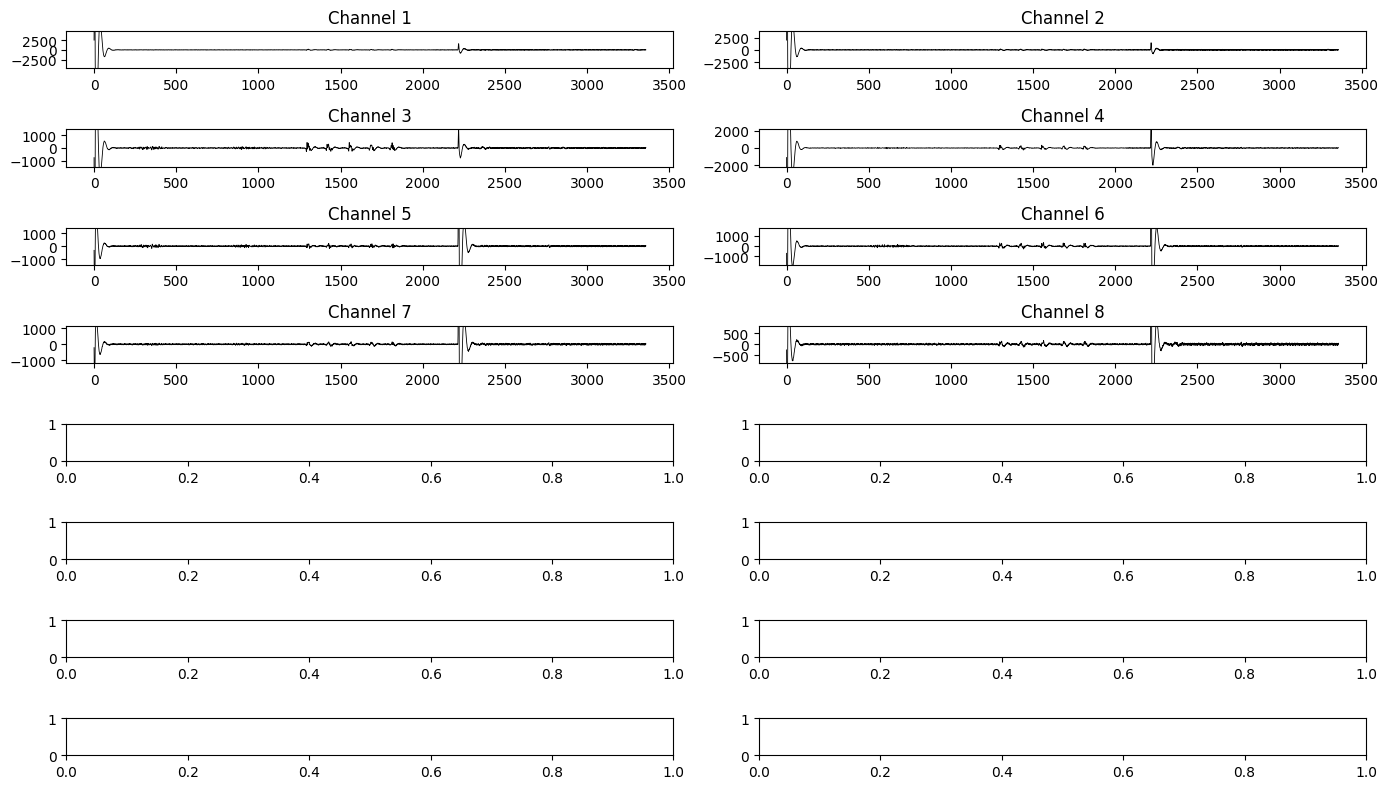

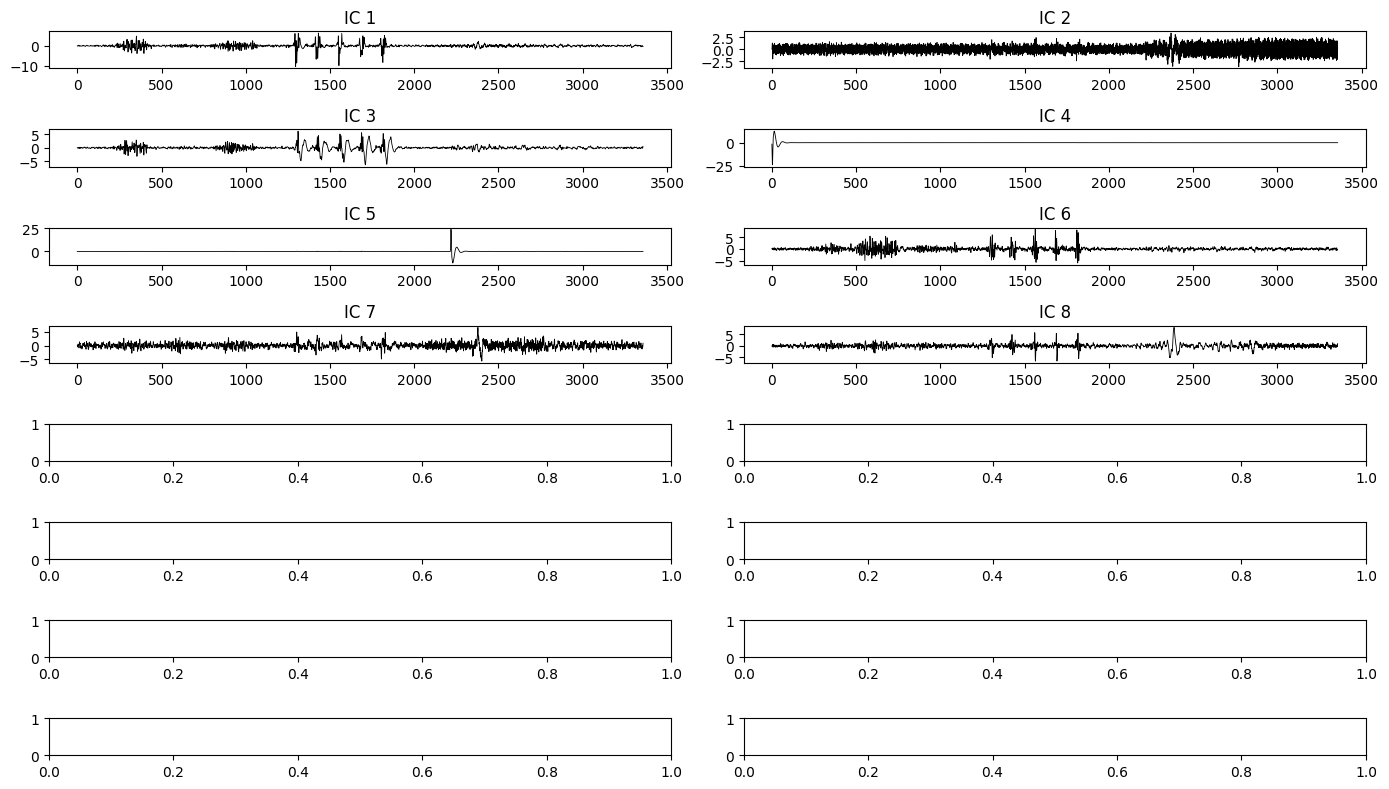

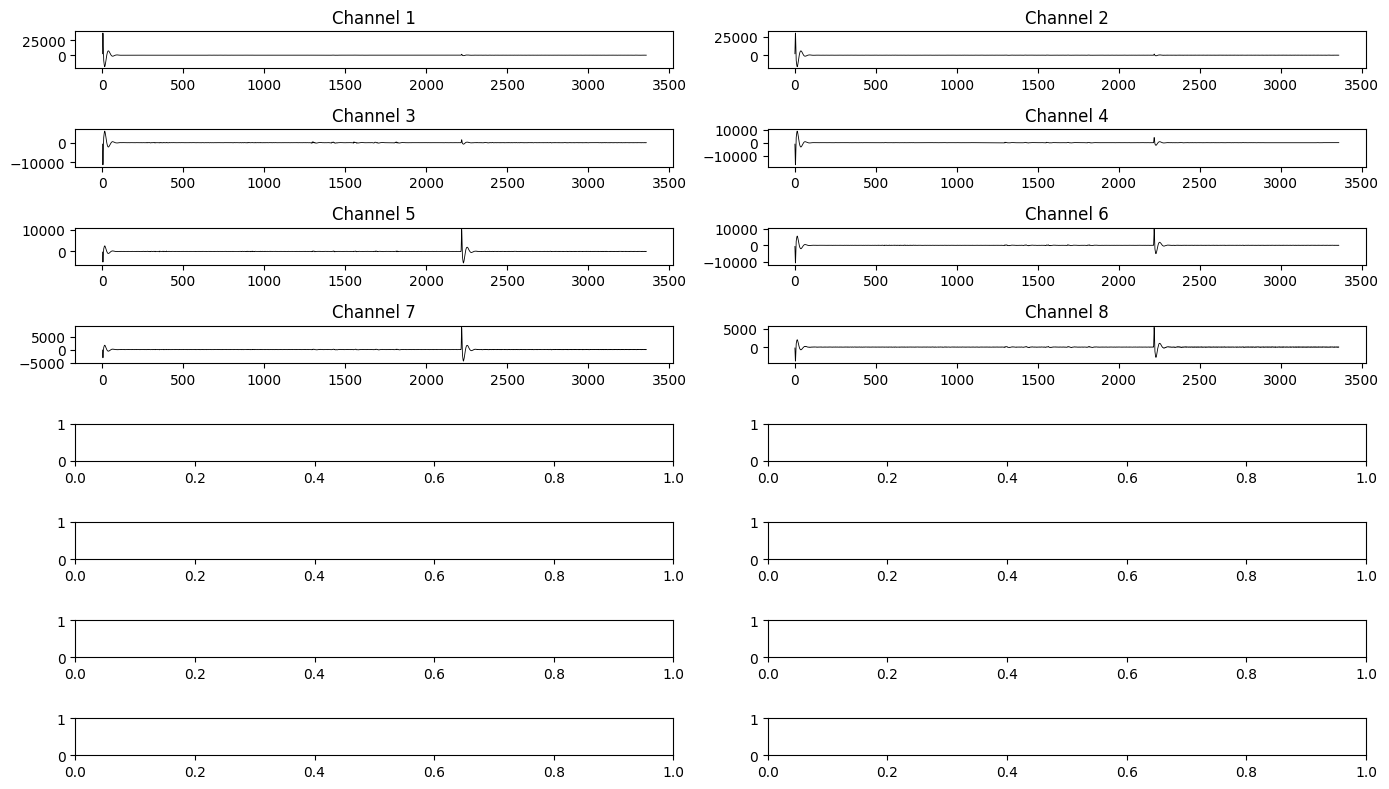

[[64580.25, 50328.66015625, -15077.5, -20772.73046875, 6606.81982421875, -3403.5, 7275.18017578125, 1871.5999755859375], [64992.05078125, 50949.30078125, -15307.6796875, -20868.94921875, 6303.0400390625, -3733.22998046875, 6959.080078125, 1563.7099609375], [65371.0703125, 51449.640625, -15491.8603515625, -21066.4296875, 6096.009765625, -3922.550048828125, 6743.41015625, 1353.510009765625], [65062.9296875, 50956.9296875, -15304.2802734375, -21033.94921875, 6354.8701171875, -3630.6201171875, 7008.169921875, 1605.550048828125], [64590.44140625, 50322.16015625, -15070.4599609375, -20796.109375, 6620.7900390625, -3389.570068359375, 7283.43017578125, 1875.8900146484375], [64869.359375, 50789.69140625, -15302.2900390625, -20872.73046875, 6312.669921875, -3721.2099609375, 6968.47021484375, 1578.9000244140625], [65330.23046875, 51410.30859375, -15506.7900390625, -21060.439453125, 6061.85986328125, -3952.280029296875, 6714.02001953125, 1324.7900390625], [65162.73046875, 51106.28125, -15360.91992

[[64984.71875, 50886.26953125, -15384.349609375, -21610.9609375, 4376.990234375, -5486.91015625, 5424.7900390625, 374.92999267578125], [65450.9609375, 51495.78125, -15597.01953125, -21942.80078125, 4133.3701171875, -6112.75, 5149.93017578125, 54.36000061035156], [65488.2890625, 51482.23046875, -15617.3203125, -22225.880859375, 4178.43994140625, -6319.5498046875, 5170.7900390625, 14.279999732971191], [64974.4609375, 50786.44921875, -15370.26953125, -21790.849609375, 4469.66015625, -5676.669921875, 5495.97998046875, 380.7200012207031], [64938.16015625, 50780.94921875, -15356.1201171875, -21694.419921875, 4430.5400390625, -5677.39013671875, 5462.35986328125, 370.3500061035156], [65355.0, 51407.25, -15619.1103515625, -21939.0390625, 4102.2998046875, -6111.5, 5117.16015625, 27.6299991607666], [65500.76171875, 51552.44140625, -15658.5595703125, -22015.55078125, 4071.659912109375, -6204.97998046875, 5074.64990234375, -40.43000030517578], [65077.23046875, 50915.078125, -15379.5, -21771.1796875

[[64973.58984375, 50801.51171875, -15378.599609375, -21765.169921875, 4295.6298828125, -6185.39990234375, 5339.27001953125, 244.92999267578125], [65359.62890625, 51364.37890625, -15648.3203125, -21891.919921875, 3956.969970703125, -6151.7099609375, 5000.89013671875, -22.149999618530273], [65480.28125, 51478.66015625, -15675.990234375, -22048.2109375, 3964.510009765625, -6312.3798828125, 5002.06982421875, -55.61000061035156], [65048.5390625, 50819.53125, -15421.669921875, -21976.029296875, 4314.22021484375, -6043.72998046875, 5360.3701171875, 266.3399963378906], [64888.48046875, 50667.87109375, -15378.599609375, -21758.890625, 4314.85009765625, -6007.7900390625, 5373.39990234375, 300.29998779296875], [65280.01171875, 51256.19140625, -15632.23046875, -21993.470703125, 3993.050048828125, -6289.06982421875, 5037.8798828125, -12.899999618530273], [65496.4609375, 51516.03125, -15715.0400390625, -22072.060546875, 3912.320068359375, -6384.259765625, 4951.85009765625, -108.98999786376953], [651

[[64811.7890625, 50670.69140625, -15451.98046875, -21901.9609375, 4159.080078125, -6238.75, 5245.52978515625, 203.91000366210938], [65244.48828125, 51306.66015625, -15718.150390625, -22051.130859375, 3793.830078125, -6529.56982421875, 4918.14013671875, -93.18000030517578], [65419.390625, 51501.5, -15731.3603515625, -22193.08984375, 3778.179931640625, -6588.27001953125, 4842.240234375, -181.25], [65018.26953125, 50875.23046875, -15528.6298828125, -22084.390625, 4133.02001953125, -6253.3701171875, 5185.6298828125, 127.72000122070312], [64779.55078125, 50610.5, -15360.9697265625, -21890.779296875, 4258.25, -6190.580078125, 5301.97021484375, 246.6699981689453], [65153.16015625, 51185.94140625, -15616.849609375, -22032.630859375, 3916.89990234375, -6514.66015625, 4971.5, -66.5199966430664], [65440.609375, 51539.23046875, -15742.849609375, -22180.529296875, 3750.85009765625, -6620.35986328125, 4822.85986328125, -207.22000122070312], [65094.98046875, 51008.1796875, -15596.9599609375, -22120.8

[[64795.671875, 50614.87890625, -15410.919921875, -22009.220703125, 4160.06005859375, -6408.06982421875, 5168.81982421875, 89.73999786376953], [65177.5, 51200.359375, -15597.580078125, -22153.009765625, 3859.429931640625, -6724.919921875, 4861.4599609375, -212.19000244140625], [65451.578125, 51534.19921875, -15852.8603515625, -22283.55078125, 3607.43994140625, -6772.8701171875, 4724.77978515625, -306.0199890136719], [65121.94140625, 50982.41015625, -15681.6904296875, -22206.390625, 3955.919921875, -6459.4501953125, 5004.81982421875, -28.5], [64770.078125, 50576.76953125, -15215.58984375, -21991.029296875, 4353.2900390625, -6355.33984375, 5246.64990234375, 148.2100067138672], [65116.75, 51122.37109375, -15532.0498046875, -22084.8203125, 3928.52001953125, -6638.740234375, 4951.77978515625, -126.51000213623047], [65476.01171875, 51564.73046875, -15696.1796875, -22253.98046875, 3569.169921875, -6796.47021484375, 4709.08984375, -323.5199890136719], [65193.62109375, 51110.9296875, -15520.129

[[64748.640625, 50542.859375, -15574.0703125, -22122.169921875, 3930.330078125, -6560.9501953125, 5051.18017578125, 1.3600000143051147]]
[[65098.8515625, 51087.8203125, -15582.1201171875, -22241.369140625, 3666.739990234375, -6891.580078125, 4719.6201171875, -315.70001220703125], [65452.30078125, 51496.08984375, -15631.2197265625, -22371.390625, 3647.3798828125, -7010.580078125, 4616.60009765625, -452.1099853515625], [65170.23828125, 51040.9609375, -15458.1298828125, -22287.189453125, 3996.889892578125, -6679.14990234375, 4948.990234375, -145.77999877929688], [64786.6015625, 50554.41015625, -15411.48046875, -22089.849609375, 4077.64990234375, -6500.60009765625, 5130.91015625, 63.0099983215332], [65096.5, 51038.48046875, -15565.5498046875, -22145.259765625, 3817.719970703125, -6780.8701171875, 4846.509765625, -197.9199981689453], [65473.8203125, 51531.5703125, -15668.5, -22324.380859375, 3556.5400390625, -6984.5, 4616.52978515625, -425.5299987792969], [65231.94921875, 51165.890625, -155

[[64725.75, 50519.2109375, -15411.83984375, -22169.150390625, 3833.7900390625, -6642.419921875, 4990.830078125, -62.650001525878906], [65006.98046875, 50985.55078125, -15648.2802734375, -22269.80078125, 3511.639892578125, -6956.85009765625, 4672.39013671875, -351.29998779296875], [65347.30859375, 51434.828125, -15841.9296875, -22462.25, 3314.739990234375, -7157.4501953125, 4460.27001953125, -566.5900268554688], [65118.9609375, 51043.73828125, -15654.580078125, -22448.76953125, 3541.070068359375, -6905.240234375, 4681.330078125, -363.239990234375], [64733.578125, 50508.19140625, -15404.080078125, -22194.880859375, 3831.0400390625, -6622.72998046875, 4989.759765625, -63.08000183105469], [64947.12890625, 50879.4296875, -15607.3701171875, -22252.880859375, 3560.2099609375, -6906.10986328125, 4723.58984375, -305.70001220703125], [65339.76171875, 51414.890625, -15774.900390625, -22432.25, 3340.830078125, -7128.080078125, 4493.5498046875, -532.75], [65220.328125, 51180.23828125, -15679.320312

[[64725.66015625, 50511.05078125, -15450.73046875, -22201.560546875, 3665.860107421875, -6763.47998046875, 4897.5400390625, -136.3000030517578], [64963.578125, 50929.140625, -15633.66015625, -22279.9296875, 3414.6298828125, -7069.77001953125, 4622.8798828125, -407.20001220703125], [65331.69140625, 51422.78125, -15831.4501953125, -22517.970703125, 3183.110107421875, -7131.60986328125, 4388.830078125, -601.02001953125], [65209.0703125, 51168.26171875, -15722.2802734375, -22600.630859375, 3382.110107421875, -7146.66015625, 4571.68994140625, -469.8999938964844], [64740.76953125, 50527.55078125, -15464.5, -22316.470703125, 3661.419921875, -6744.91015625, 4871.85009765625, -152.19000244140625]]
[[64860.359375, 50786.19921875, -15614.0595703125, -22309.7890625, 3428.580078125, -6848.39990234375, 4647.83984375, -338.1600036621094], [65315.91015625, 51400.359375, -15783.9501953125, -22408.16015625, 3204.4599609375, -7321.64990234375, 4401.91015625, -609.510009765625], [65252.1796875, 51265.1992

[[64770.01171875, 50569.19140625, -15425.9697265625, -22136.1796875, 3553.72998046875, -6848.27978515625, 4803.7001953125, -163.7899932861328], [64948.69140625, 50899.94921875, -15580.8896484375, -22273.310546875, 3342.89990234375, -7165.25, 4594.2001953125, -373.5199890136719], [65357.7109375, 51468.359375, -15781.2001953125, -22417.48046875, 3101.280029296875, -7435.68994140625, 4337.830078125, -626.0700073242188], [65321.26953125, 51319.94140625, -15696.240234375, -22508.560546875, 3251.280029296875, -7355.22021484375, 4488.39013671875, -510.0400085449219], [64843.28125, 50618.37890625, -15487.41015625, -22385.51953125, 3568.389892578125, -6951.18994140625, 4815.2099609375, -174.25]]
[[64865.12109375, 50769.171875, -15586.900390625, -22286.23046875, 3380.25, -7154.68017578125, 4620.7998046875, -354.0299987792969], [65309.62890625, 51409.4609375, -15754.759765625, -22369.98046875, 3102.60009765625, -7374.56005859375, 4333.43994140625, -618.9600219726562], [65344.03125, 51367.73046875

[[64705.8203125, 50503.80859375, -15514.8095703125, -22372.529296875, 3439.219970703125, -7319.77001953125, 4690.89013671875, -273.2699890136719], [64795.921875, 50731.8203125, -15612.8896484375, -22250.109375, 3238.389892578125, -7299.33984375, 4498.509765625, -416.8599853515625], [65217.26953125, 51325.73046875, -15814.7099609375, -22322.400390625, 2953.199951171875, -7565.64013671875, 4216.39013671875, -683.3599853515625], [65244.140625, 51270.12109375, -15780.509765625, -22516.740234375, 3063.18994140625, -7519.7099609375, 4328.4599609375, -603.25], [64799.109375, 50618.33984375, -15509.0302734375, -22367.05078125, 3434.659912109375, -7228.77978515625, 4687.0, -267.3500061035156], [64728.8203125, 50612.1484375, -15587.3203125, -22255.939453125, 3288.989990234375, -7382.8701171875, 4546.259765625, -396.3900146484375], [65183.76953125, 51258.98046875, -15801.830078125, -22458.44921875, 3005.659912109375, -7744.52001953125, 4249.64990234375, -697.0399780273438], [65310.8984375, 51364.

[[64779.01953125, 50610.2890625, -15518.1904296875, -22405.609375, 3290.3798828125, -7511.2099609375, 4590.47021484375, -332.5299987792969], [64780.6484375, 50703.5, -15596.98046875, -22335.140625, 3160.070068359375, -7671.31982421875, 4460.1298828125, -445.2699890136719], [65216.26171875, 51316.5, -15818.240234375, -22499.220703125, 2888.68994140625, -7930.60009765625, 4173.580078125, -721.489990234375], [65315.5703125, 51382.33984375, -15781.0498046875, -22580.98046875, 2926.60009765625, -7875.52001953125, 4202.1298828125, -704.010009765625], [64892.76953125, 50749.76953125, -15522.1904296875, -22395.75, 3282.0400390625, -7505.31005859375, 4573.8798828125, -352.54998779296875], [64774.28125, 50659.48828125, -15512.08984375, -22287.6796875, 3255.72998046875, -7574.2001953125, 4566.259765625, -357.0899963378906], [65161.83984375, 51237.80078125, -15758.759765625, -22470.25, 2935.860107421875, -7896.39990234375, 4232.85986328125, -677.6199951171875], [65330.859375, 51421.8203125, -15833

[[64780.4296875, 50628.3515625, -15637.66015625, -22560.7109375, 3106.02001953125, -7677.91015625, 4435.31982421875, -505.7300109863281], [64725.0390625, 50625.609375, -15611.330078125, -22437.330078125, 3083.909912109375, -7748.97021484375, 4406.509765625, -519.8800048828125], [65120.8203125, 51207.23828125, -15854.51953125, -22613.619140625, 2763.639892578125, -8065.06982421875, 4075.239990234375, -838.969970703125], [65266.1796875, 51351.51953125, -15909.7900390625, -22725.310546875, 2726.889892578125, -8071.97021484375, 4038.27001953125, -879.7000122070312], [64871.0, 50746.8203125, -15641.9697265625, -22585.16015625, 3069.360107421875, -7717.25, 4388.47021484375, -548.5599975585938]]
[[64644.2109375, 50515.80859375, -15626.099609375, -22462.380859375, 3078.530029296875, -7742.0, 4411.7900390625, -513.3499755859375], [65011.62890625, 51070.921875, -15862.0, -22621.94921875, 2765.56005859375, -8064.1298828125, 4085.030029296875, -828.780029296875], [65264.03125, 51368.8203125, -1594

[[64779.91015625, 50665.140625, -15658.740234375, -22653.560546875, 2979.14990234375, -7866.759765625, 4316.8798828125, -612.969970703125], [64612.26953125, 50514.51953125, -15632.830078125, -22526.2890625, 2971.239990234375, -7938.91015625, 4311.10986328125, -610.0700073242188], [65018.5, 51107.87109375, -15849.9296875, -22660.060546875, 2674.989990234375, -8208.5400390625, 4002.389892578125, -898.8499755859375], [65262.75, 51381.1796875, -15900.7197265625, -22764.779296875, 2637.889892578125, -8206.0595703125, 3958.469970703125, -947.2000122070312], [64906.46875, 50820.1796875, -15698.0498046875, -22680.220703125, 2940.219970703125, -7900.740234375, 4264.419921875, -660.25], [64599.19921875, 50465.51953125, -15628.650390625, -22543.189453125, 2987.60009765625, -7879.009765625, 4324.009765625, -594.2000122070312], [64905.390625, 50961.390625, -15859.5, -22681.58984375, 2667.18994140625, -8206.6904296875, 3997.340087890625, -906.8499755859375], [65217.890625, 51350.76171875, -15966.320

[[64750.5703125, 50685.8203125, -15750.759765625, -22774.66015625, 2796.179931640625, -8049.85009765625, 4143.47998046875, -782.3800048828125], [64536.83984375, 50446.58984375, -15652.2802734375, -22600.830078125, 2879.510009765625, -8007.52978515625, 4238.08984375, -686.2899780273438], [64897.62109375, 50995.69921875, -15878.4296875, -22739.099609375, 2584.090087890625, -8317.3095703125, 3924.610107421875, -987.4099731445312], [65178.98046875, 51332.48046875, -15991.91015625, -22876.3203125, 2478.320068359375, -8411.23046875, 3818.909912109375, -1099.239990234375], [64887.01953125, 50849.4296875, -15764.8603515625, -22781.2109375, 2766.22998046875, -8110.080078125, 4125.64013671875, -813.4500122070312], [64544.41015625, 50416.94921875, -15613.9697265625, -22605.859375, 2917.60009765625, -7981.08984375, 4272.0, -659.6400146484375], [64821.9296875, 50876.37109375, -15843.16015625, -22713.419921875, 2629.5, -8285.5498046875, 3966.81005859375, -950.4400024414062], [65173.4609375, 51328.80

[[64797.1015625, 50771.94140625, -15792.580078125, -22836.91015625, 2655.360107421875, -8221.599609375, 3986.429931640625, -916.3300170898438], [64511.671875, 50417.6015625, -15645.0400390625, -22637.490234375, 2798.169921875, -8110.7998046875, 4145.8701171875, -754.010009765625], [64820.28125, 50907.53125, -15858.8798828125, -22755.859375, 2503.510009765625, -8416.58984375, 3848.2099609375, -1031.8900146484375], [65130.37109375, 51303.8203125, -16000.7001953125, -22916.640625, 2346.659912109375, -8560.830078125, 3682.5400390625, -1196.93994140625], [64879.12890625, 50887.5390625, -15845.169921875, -22879.2890625, 2584.0, -8293.5302734375, 3926.530029296875, -967.7000122070312], [64504.2890625, 50396.33984375, -15646.759765625, -22663.599609375, 2804.93994140625, -8091.7099609375, 4157.08984375, -738.5900268554688]]
[[64760.0703125, 50825.7890625, -15808.4697265625, -22707.109375, 2560.639892578125, -8358.8603515625, 3900.780029296875, -979.989990234375], [65117.359375, 51305.87890625,

[[64818.44921875, 50845.1015625, -15821.3203125, -22885.029296875, 2528.300048828125, -8354.58984375, 3872.419921875, -1020.739990234375], [64466.140625, 50390.12890625, -15649.9296875, -22686.419921875, 2714.239990234375, -8197.0302734375, 4067.929931640625, -826.1400146484375], [64719.69921875, 50821.62890625, -15860.599609375, -22782.619140625, 2423.580078125, -8498.669921875, 3773.889892578125, -1095.6400146484375], [65075.4296875, 51290.25, -16025.3701171875, -22950.970703125, 2230.530029296875, -8675.3603515625, 3570.0, -1294.4599609375], [64917.37890625, 50984.890625, -15876.3095703125, -22915.5, 2457.530029296875, -8421.5595703125, 3803.239990234375, -1079.52001953125], [64499.73046875, 50417.78125, -15656.83984375, -22709.76953125, 2715.5400390625, -8182.5498046875, 4077.090087890625, -813.0700073242188], [64662.5390625, 50732.3984375, -15821.5, -22755.30078125, 2469.800048828125, -8451.8896484375, 3823.31005859375, -1045.18994140625], [65039.30078125, 51249.0, -16034.12988281

[[64897.1484375, 50960.96875, -15883.4599609375, -22966.150390625, 2372.929931640625, -8519.900390625, 3725.389892578125, -1142.510009765625], [64499.53125, 50429.9609375, -15674.6298828125, -22752.98046875, 2610.260009765625, -8297.6201171875, 3976.97998046875, -890.6699829101562], [64704.01171875, 50793.53125, -15844.23046875, -22802.619140625, 2360.52001953125, -8567.509765625, 3721.25, -1122.77001953125], [65079.0, 51299.26171875, -16030.26953125, -22977.75, 2140.219970703125, -8784.2998046875, 3485.489990234375, -1359.5899658203125], [64947.23828125, 51049.73046875, -15951.4599609375, -23006.380859375, 2283.8798828125, -8612.150390625, 3632.39990234375, -1226.75], [64512.1796875, 50441.19921875, -15709.0302734375, -22795.33984375, 2583.260009765625, -8319.23046875, 3949.530029296875, -919.4600219726562], [64611.19921875, 50667.578125, -15826.01953125, -22790.779296875, 2395.14990234375, -8541.849609375, 3760.949951171875, -1095.550048828125], [65034.359375, 51243.26953125, -16007.

[[64869.05078125, 50963.828125, -15948.8896484375, -23033.580078125, 2198.320068359375, -8702.0, 3562.489990234375, -1266.56005859375], [64457.26953125, 50388.828125, -15705.58984375, -22814.16015625, 2493.3798828125, -8423.6298828125, 3869.3798828125, -973.4000244140625], [64587.12890625, 50660.19921875, -15846.759765625, -22833.890625, 2278.0, -8671.900390625, 3651.510009765625, -1181.510009765625], [64996.6796875, 51219.94140625, -16026.2197265625, -22989.80078125, 2053.340087890625, -8888.83984375, 3409.070068359375, -1416.9200439453125], [64957.5, 51092.0390625, -15961.9404296875, -23024.2890625, 2172.989990234375, -8733.51953125, 3537.010009765625, -1294.3900146484375], [64522.30859375, 50466.83984375, -15706.1201171875, -22824.640625, 2494.320068359375, -8408.48046875, 3874.719970703125, -966.02001953125], [64536.078125, 50580.48046875, -15795.1298828125, -22793.009765625, 2335.02001953125, -8602.849609375, 3710.5, -1114.47998046875], [64958.44140625, 51168.91015625, -15991.3095

[[64912.3203125, 51029.98828125, -15976.150390625, -23072.7890625, 2080.89990234375, -8816.330078125, 3462.419921875, -1349.06005859375], [64481.55859375, 50414.16015625, -15721.6796875, -22868.630859375, 2394.93994140625, -8511.6298828125, 3787.699951171875, -1040.0699462890625], [64542.69921875, 50591.359375, -15824.0302734375, -22847.439453125, 2220.780029296875, -8716.2197265625, 3607.909912109375, -1203.06005859375], [64947.2109375, 51156.859375, -16031.6103515625, -23025.630859375, 1956.27001953125, -8976.6201171875, 3323.389892578125, -1478.3900146484375], [64993.23828125, 51141.8203125, -15988.7197265625, -23072.2109375, 2049.409912109375, -8857.3701171875, 3422.030029296875, -1386.8399658203125], [64563.87890625, 50514.3984375, -15730.0595703125, -22889.5703125, 2389.02001953125, -8510.990234375, 3783.409912109375, -1041.75], [64491.078125, 50514.3984375, -15776.6904296875, -22828.169921875, 2282.60009765625, -8653.990234375, 3675.610107421875, -1136.449951171875], [64886.1992

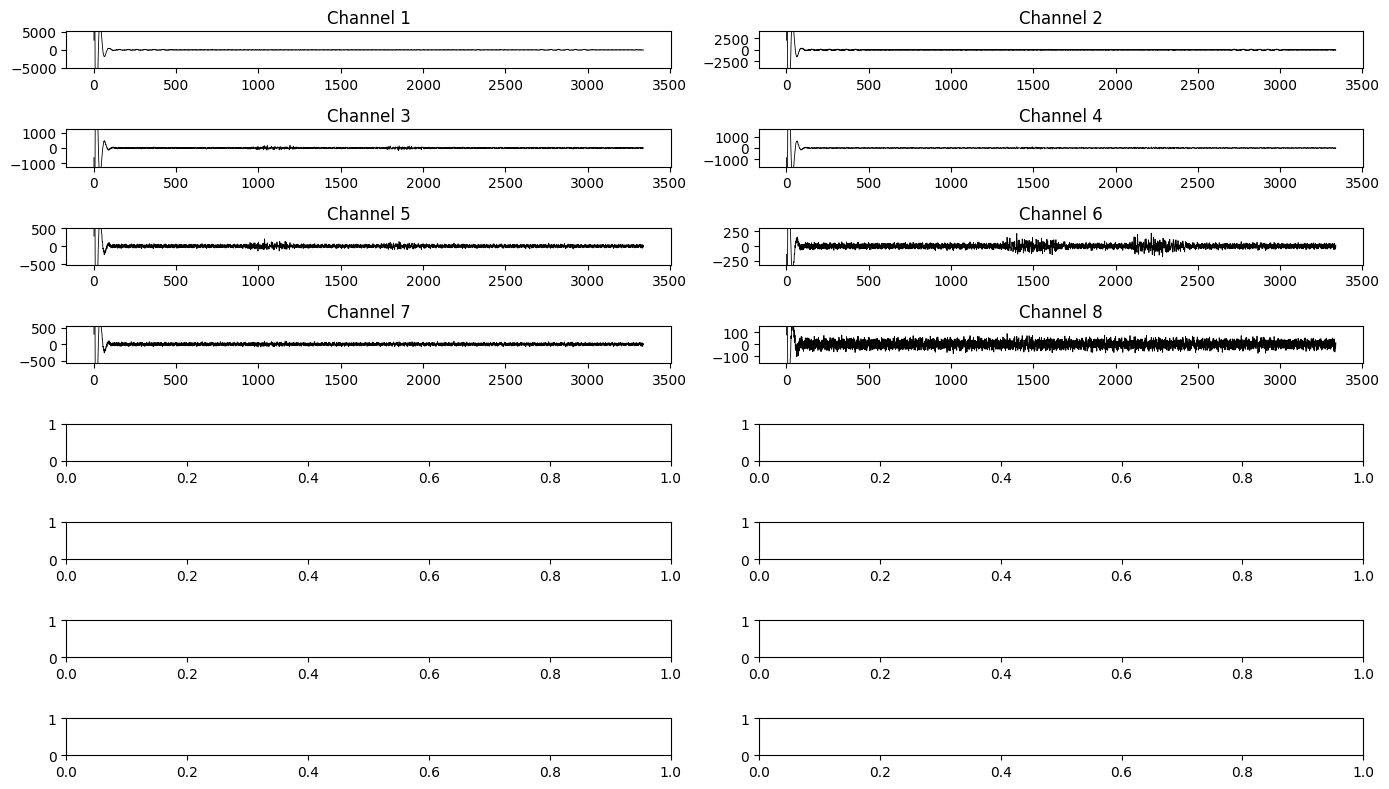

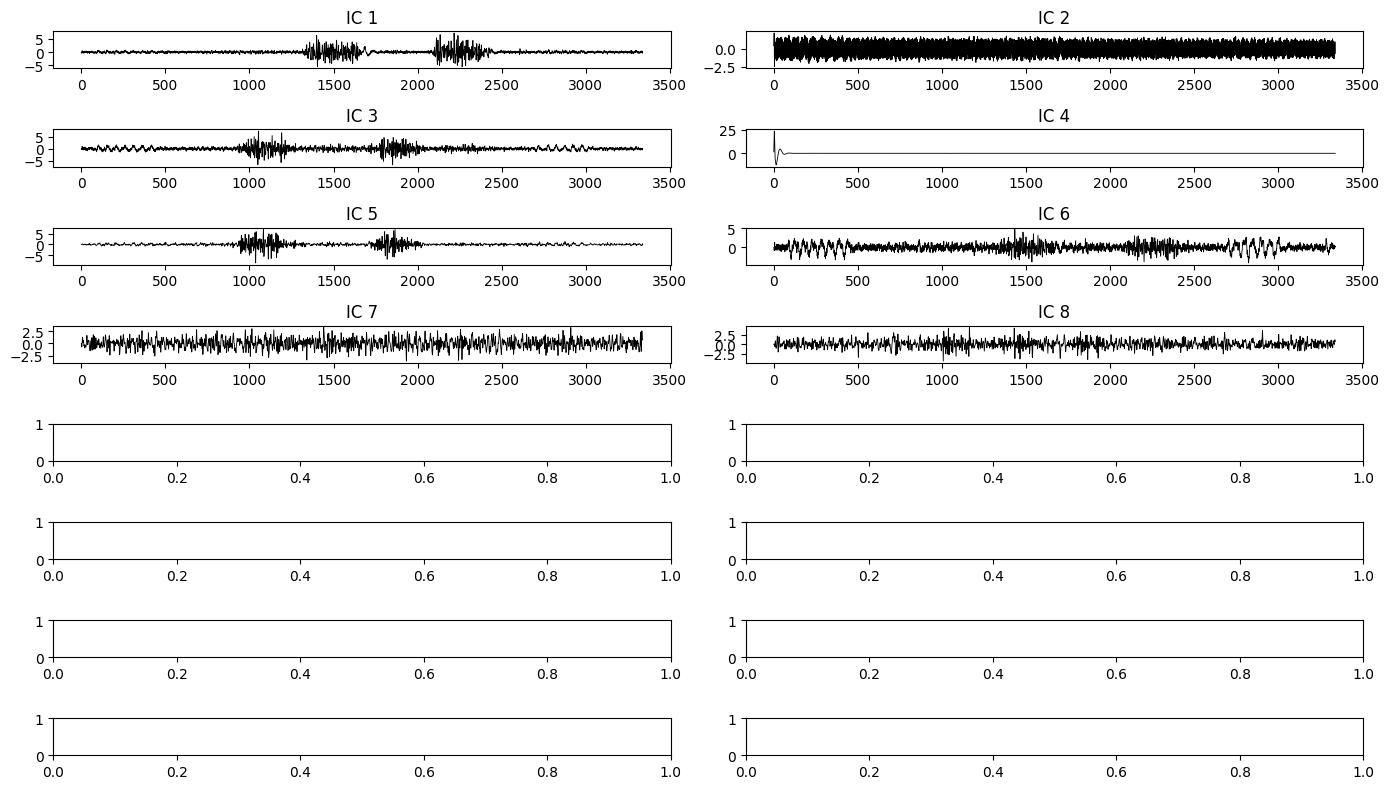

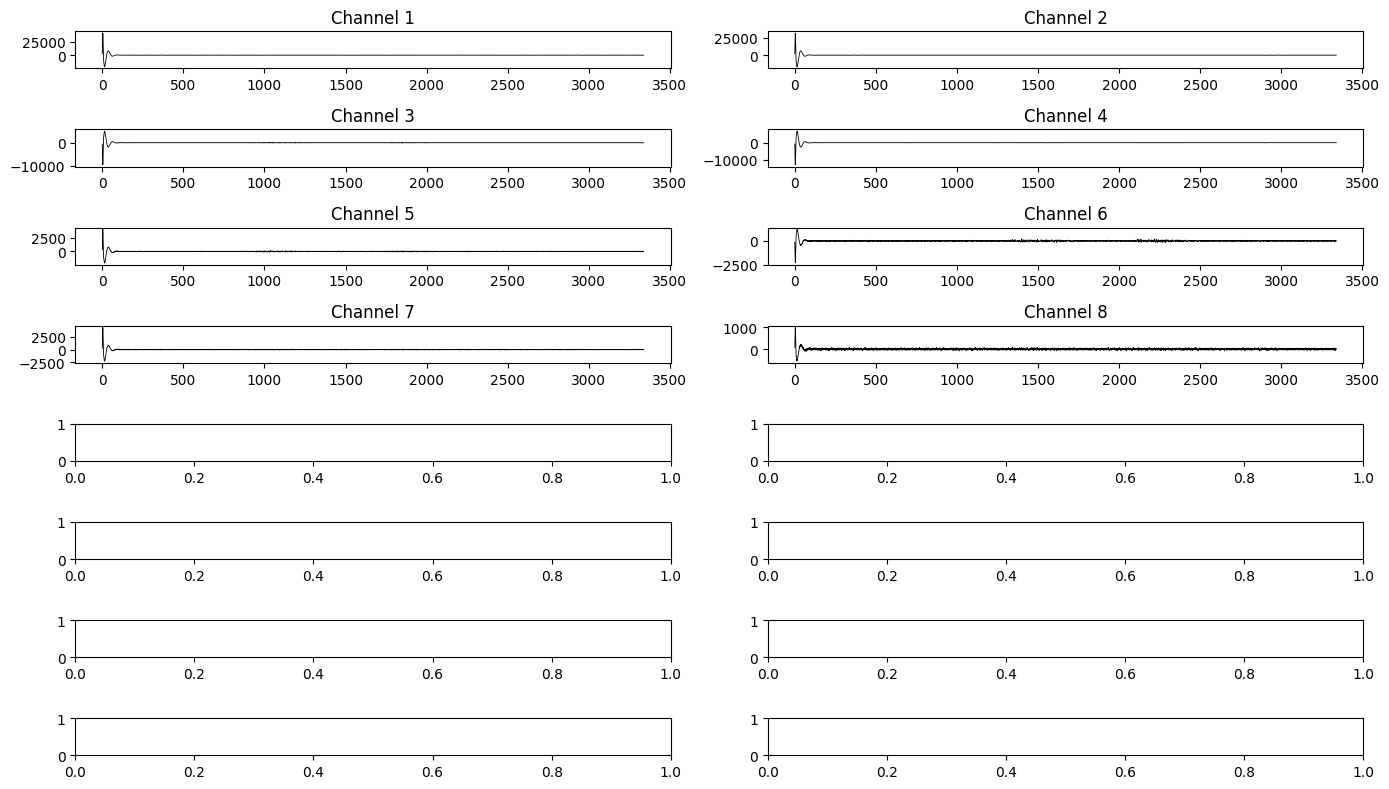

[[64618.19921875, 50785.37890625, -16061.23046875, -23170.349609375, 1928.489990234375, -8992.580078125, 3314.050048828125, -1467.75], [64190.23046875, 50157.78125, -15800.509765625, -22981.41015625, 2258.110107421875, -8663.0703125, 3647.25, -1147.3599853515625], [64179.5, 50229.98046875, -15847.9697265625, -22911.859375, 2152.919921875, -8806.0703125, 3554.110107421875, -1229.8399658203125], [64580.08984375, 50808.19921875, -16058.7900390625, -23072.650390625, 1882.1300048828125, -9063.990234375, 3279.85009765625, -1484.199951171875], [64674.28125, 50870.91015625, -16080.1298828125, -23169.83984375, 1887.0, -9028.849609375, 3278.669921875, -1487.8199462890625], [64259.16015625, 50249.08984375, -15847.58984375, -23026.30078125, 2201.739990234375, -8700.009765625, 3599.5, -1179.77001953125], [64116.73828125, 50143.3203125, -15820.1396484375, -22896.7890625, 2190.199951171875, -8749.5703125, 3601.419921875, -1172.8399658203125], [64506.1484375, 50709.87109375, -16035.8603515625, -23047.

[[63810.140625, 50536.87109375, -16412.80078125, -23795.349609375, 398.82000732421875, -10663.9501953125, 1980.6800537109375, -2408.179931640625], [63629.21875, 50211.01953125, -16268.2001953125, -23763.7890625, 626.0499877929688, -10412.580078125, 2219.840087890625, -2190.52001953125], [63247.75, 49703.80078125, -16086.5703125, -23582.6796875, 838.9299926757812, -10220.26953125, 2444.389892578125, -1972.52001953125], [63442.359375, 50045.4609375, -16235.1396484375, -23619.060546875, 610.1799926757812, -10472.98046875, 2206.159912109375, -2196.300048828125], [63798.671875, 50518.828125, -16406.9609375, -23783.109375, 398.92999267578125, -10679.259765625, 1983.0, -2419.0400390625], [63684.0703125, 50288.08984375, -16335.2998046875, -23817.349609375, 530.8300170898438, -10512.7197265625, 2116.800048828125, -2290.580078125], [63292.0703125, 49736.26953125, -16087.8203125, -23607.779296875, 832.4000244140625, -10214.83984375, 2430.0400390625, -1983.469970703125], [63355.87890625, 49930.910

[[63761.4296875, 50488.48046875, -16407.16015625, -23795.8203125, 325.4599914550781, -10750.25, 1931.949951171875, -2441.7900390625], [63641.41015625, 50240.44140625, -16304.1904296875, -23801.51953125, 499.80999755859375, -10548.7001953125, 2102.830078125, -2281.3798828125], [63252.859375, 49707.5703125, -16087.08984375, -23611.689453125, 753.1199951171875, -10301.6298828125, 2368.22998046875, -2022.6800537109375], [63377.3203125, 49962.921875, -16202.3095703125, -23611.509765625, 556.8900146484375, -10524.0302734375, 2165.6201171875, -2207.43994140625], [63730.4296875, 50449.359375, -16394.150390625, -23784.490234375, 320.3699951171875, -10752.66015625, 1919.1700439453125, -2445.260009765625], [63684.76953125, 50321.44140625, -16346.8603515625, -23832.94921875, 423.57000732421875, -10619.4501953125, 2027.1199951171875, -2350.7099609375], [63296.7890625, 49751.19921875, -16102.669921875, -23646.19921875, 731.77001953125, -10312.9599609375, 2348.5, -2039.5699462890625], [63290.94921875

[[63675.37890625, 50415.5390625, -16404.4609375, -23855.880859375, 219.27000427246094, -10835.900390625, 1859.489990234375, -2486.179931640625], [63586.75, 50234.71875, -16332.6396484375, -23883.439453125, 351.7699890136719, -10670.3701171875, 2000.75, -2358.97998046875], [63199.4609375, 49681.62109375, -16092.3798828125, -23687.419921875, 648.27001953125, -10374.9404296875, 2309.93994140625, -2055.330078125], [63270.5390625, 49861.890625, -16182.240234375, -23660.9296875, 483.0199890136719, -10569.2900390625, 2144.780029296875, -2205.760009765625], [63635.48046875, 50373.1015625, -16385.099609375, -23825.419921875, 226.0, -10819.5400390625, 1883.0, -2472.969970703125], [63668.609375, 50337.421875, -16357.7001953125, -23890.060546875, 306.6700134277344, -10733.330078125, 1956.25, -2424.780029296875], [63267.91015625, 49748.76953125, -16128.76953125, -23736.369140625, 612.4199829101562, -10429.9296875, 2270.330078125, -2123.820068359375], [63239.76953125, 49788.98046875, -16132.8203125,

[[63635.23046875, 50853.51953125, -16417.220703125, -23848.099609375, 153.47000122070312, -10926.1396484375, 1796.8599853515625, -2538.530029296875]]
[[63601.53125, 50731.48046875, -16376.58984375, -23906.130859375, 250.97000122070312, -10805.5498046875, 1895.469970703125, -2449.35009765625], [63211.94140625, 50179.98046875, -16131.0498046875, -23718.150390625, 563.510009765625, -10490.4296875, 2218.919921875, -2138.699951171875], [63221.5703125, 50288.359375, -16195.98046875, -23665.470703125, 433.7799987792969, -10648.83984375, 2088.75, -2251.830078125], [63592.8984375, 50807.171875, -16395.33984375, -23820.6796875, 174.19000244140625, -10902.330078125, 1815.3900146484375, -2514.77001953125], [63637.0, 50799.05078125, -16430.970703125, -23933.169921875, 172.6699981689453, -10884.1396484375, 1815.8599853515625, -2523.580078125], [63270.44921875, 50256.87109375, -16171.75, -23762.720703125, 513.219970703125, -10526.91015625, 2165.969970703125, -2183.679931640625], [63158.26953125, 5020

[[63575.80078125, 50899.5703125, -16416.169921875, -23866.3203125, 80.44000244140625, -10998.3095703125, 1733.1300048828125, -2582.89990234375], [63603.140625, 50858.9609375, -16419.30078125, -23953.779296875, 121.26000213623047, -10929.150390625, 1781.300048828125, -2545.77001953125], [63234.73828125, 50314.1796875, -16176.3798828125, -23792.220703125, 440.3299865722656, -10607.7099609375, 2112.68994140625, -2233.139892578125], [63172.44140625, 50323.8984375, -16189.9501953125, -23704.359375, 370.5, -10715.6298828125, 2043.550048828125, -2289.530029296875], [63510.87109375, 50813.4296875, -16403.880859375, -23861.380859375, 92.72000122070312, -10988.76953125, 1755.47998046875, -2562.489990234375], [63616.73046875, 50901.828125, -16450.73046875, -23973.7890625, 68.48999786376953, -10990.0, 1734.4100341796875, -2593.7900390625], [63304.859375, 50404.33984375, -16189.6396484375, -23818.439453125, 414.0199890136719, -10635.51953125, 2084.169921875, -2267.830078125], [63136.640625, 50254.8

[[63485.76953125, 50895.7890625, -16419.83984375, -23886.2109375, -2.9100000858306885, -11074.2197265625, 1673.1199951171875, -2609.300048828125], [63581.96875, 50946.98046875, -16438.51953125, -23976.509765625, 9.75, -11037.2197265625, 1686.239990234375, -2602.06005859375], [63193.16015625, 50374.26171875, -16225.759765625, -23855.119140625, 305.67999267578125, -10728.7001953125, 1993.1300048828125, -2310.3701171875], [63046.359375, 50275.9296875, -16209.349609375, -23746.779296875, 281.70001220703125, -10792.650390625, 1968.8299560546875, -2327.1298828125], [63401.41015625, 50797.26953125, -16403.16015625, -23870.5703125, 20.850000381469727, -11053.51953125, 1692.1600341796875, -2589.760009765625], [63610.21875, 51005.33984375, -16440.98046875, -23964.890625, -6.150000095367432, -11060.580078125, 1659.6400146484375, -2623.6298828125], [63303.16015625, 50511.7890625, -16248.5302734375, -23879.9609375, 270.5899963378906, -10762.4296875, 1940.3800048828125, -2357.530029296875], [63058.0

[[63426.16015625, 50852.71875, -16401.060546875, -23903.1796875, -66.69999694824219, -11125.6298828125, 1614.97998046875, -2651.300048828125], [63572.23046875, 50975.359375, -16457.5390625, -24021.80078125, -99.52999877929688, -11143.2802734375, 1582.3699951171875, -2701.18994140625], [63236.55078125, 50448.69140625, -16243.5498046875, -23913.330078125, 216.5, -10827.990234375, 1913.4000244140625, -2399.280029296875], [63026.91015625, 50263.76953125, -16178.9501953125, -23769.869140625, 253.8699951171875, -10819.4501953125, 1972.81005859375, -2331.419921875], [63341.44921875, 50751.109375, -16372.1396484375, -23881.359375, -12.15999984741211, -11087.1396484375, 1695.25, -2591.3701171875], [63572.76171875, 51003.30078125, -16463.7109375, -24011.720703125, -103.58000183105469, -11159.1298828125, 1596.3399658203125, -2689.27001953125], [63311.94140625, 50567.6015625, -16281.2099609375, -23938.25, 160.77999877929688, -10860.849609375, 1869.77001953125, -2425.5400390625], [63022.01953125, 5

[[63370.390625, 50808.1484375, -16371.400390625, -23882.640625, -108.54000091552734, -11176.6103515625, 1578.06005859375, -2653.6201171875]]
[[63555.2109375, 51000.1484375, -16443.369140625, -24002.240234375, -166.19000244140625, -11219.4404296875, 1522.9100341796875, -2718.330078125], [63257.578125, 50527.3203125, -16255.83984375, -23918.1796875, 109.86000061035156, -10920.1201171875, 1816.280029296875, -2447.93994140625], [63014.12890625, 50266.30078125, -16164.3798828125, -23767.099609375, 188.08999633789062, -10879.240234375, 1899.2099609375, -2367.2099609375], [63301.2109375, 50721.94140625, -16353.5595703125, -23862.919921875, -77.13999938964844, -11150.58984375, 1620.4300537109375, -2628.52001953125], [63552.890625, 51020.98046875, -16467.689453125, -24000.3203125, -198.9499969482422, -11250.91015625, 1495.2900390625, -2748.659912109375], [63336.96875, 50639.55078125, -16287.6298828125, -23935.51953125, 61.11000061035156, -10960.919921875, 1763.4000244140625, -2496.760009765625]

[[63262.05078125, 50658.62109375, -16419.2109375, -23962.76953125, -207.9199981689453, -11262.8203125, 1509.06005859375, -2716.8798828125], [63508.69921875, 50924.48828125, -16502.26953125, -24086.4609375, -290.3900146484375, -11334.1904296875, 1420.719970703125, -2809.320068359375], [63249.8203125, 50495.5, -16332.6201171875, -24022.16015625, -34.79999923706055, -11055.1298828125, 1690.31005859375, -2559.89990234375], [62953.51171875, 50152.01953125, -16200.6796875, -23844.859375, 99.7300033569336, -10948.0400390625, 1835.949951171875, -2409.760009765625], [63192.69140625, 50559.73046875, -16385.080078125, -23930.5390625, -162.58999633789062, -11222.1796875, 1560.800048828125, -2663.719970703125], [63496.25, 50924.16015625, -16503.369140625, -24066.279296875, -301.1199951171875, -11350.48046875, 1415.0400390625, -2813.35009765625], [63327.828125, 50601.30859375, -16361.0703125, -24032.6796875, -79.80000305175781, -11103.0498046875, 1649.4000244140625, -2604.219970703125], [62971.32031

[[63202.55078125, 50581.94921875, -16397.080078125, -23953.650390625, -245.94000244140625, -11327.330078125, 1477.3199462890625, -2754.64990234375], [63458.9296875, 50890.609375, -16528.599609375, -24107.16015625, -385.67999267578125, -11456.0703125, 1333.9300537109375, -2905.989990234375], [63251.76953125, 50523.7890625, -16361.7900390625, -24054.69921875, -136.47999572753906, -11180.099609375, 1593.18994140625, -2656.820068359375], [62943.25, 50140.390625, -16183.599609375, -23854.3203125, 54.34000015258789, -11008.2802734375, 1798.1300048828125, -2446.820068359375], [63131.921875, 50485.3515625, -16376.26953125, -23942.33984375, -220.9199981689453, -11299.7900390625, 1513.0799560546875, -2714.239990234375], [63442.71875, 50885.1796875, -16509.80078125, -24074.9296875, -382.9100036621094, -11447.580078125, 1341.97998046875, -2882.260009765625], [63298.328125, 50612.3515625, -16398.869140625, -24075.240234375, -201.75, -11239.6201171875, 1530.1600341796875, -2706.169921875], [62955.21

[[63131.25, 50482.3984375, -16386.109375, -23955.529296875, -306.4200134277344, -11361.8603515625, 1449.97998046875, -2772.31005859375], [63445.9609375, 50863.359375, -16502.220703125, -24079.529296875, -442.4800109863281, -11478.4697265625, 1310.9300537109375, -2900.969970703125], [63263.76953125, 50539.62109375, -16384.41015625, -24075.259765625, -246.22999572753906, -11261.8603515625, 1517.3699951171875, -2717.820068359375], [62903.48046875, 50078.98828125, -16198.509765625, -23891.619140625, -28.43000030517578, -11063.01953125, 1747.77001953125, -2494.860107421875], [63054.109375, 50377.5, -16349.1201171875, -23933.509765625, -253.9199981689453, -11315.099609375, 1516.3599853515625, -2707.7099609375]]
[[63378.91015625, 50800.62109375, -16520.529296875, -24094.130859375, -461.5, -11510.9697265625, 1300.780029296875, -2921.10009765625], [63298.91015625, 50609.30859375, -16453.099609375, -24129.359375, -333.6199951171875, -11354.349609375, 1431.739990234375, -2805.639892578125], [6292

[[63058.359375, 50432.75, -16356.3603515625, -23936.7109375, -340.19000244140625, -11386.400390625, 1441.1099853515625, -2758.1201171875]]
[[63375.890625, 50839.69140625, -16517.359375, -24094.8203125, -531.1900024414062, -11565.1103515625, 1235.0, -2961.159912109375], [63278.73046875, 50613.91015625, -16406.609375, -24092.029296875, -350.25, -11361.080078125, 1418.3299560546875, -2798.18994140625], [62912.0, 50113.23046875, -16198.669921875, -23910.349609375, -90.45999908447266, -11124.9501953125, 1697.9100341796875, -2544.1201171875], [62987.91015625, 50327.87890625, -16337.830078125, -23935.279296875, -301.8800048828125, -11364.7197265625, 1489.3900146484375, -2732.3701171875], [63330.0, 50789.78125, -16518.990234375, -24092.740234375, -525.0599975585938, -11576.009765625, 1252.8800048828125, -2956.889892578125], [63310.44140625, 50674.51171875, -16461.009765625, -24131.630859375, -414.2200012207031, -11437.900390625, 1365.5999755859375, -2853.1298828125], [62949.75, 50158.3203125, 

[[63011.3515625, 50358.23046875, -16360.7197265625, -23961.490234375, -383.489990234375, -11428.6298828125, 1425.4200439453125, -2777.340087890625], [63338.01953125, 50787.3203125, -16531.9296875, -24122.470703125, -592.6099853515625, -11629.080078125, 1200.489990234375, -2997.949951171875], [63281.6796875, 50619.12109375, -16457.900390625, -24151.640625, -462.75, -11476.150390625, 1327.3800048828125, -2882.610107421875], [62914.55078125, 50113.19140625, -16226.830078125, -23961.69921875, -174.38999938964844, -11192.8095703125, 1619.0, -2597.139892578125], [62979.05078125, 50288.76171875, -16309.8203125, -23932.2109375, -330.30999755859375, -11377.1904296875, 1453.739990234375, -2734.31005859375], [63334.109375, 50762.421875, -16507.58984375, -24093.4609375, -580.5599975585938, -11616.8701171875, 1189.719970703125, -2984.3798828125], [63317.26171875, 50690.21875, -16503.23046875, -24163.9609375, -521.6699829101562, -11534.9697265625, 1263.7900390625, -2931.590087890625], [62954.7617187

[[62895.76953125, 50266.48046875, -16359.2001953125, -23985.859375, -452.30999755859375, -11522.009765625, 1360.1300048828125, -2835.719970703125], [63248.0390625, 50733.8984375, -16528.80078125, -24127.05078125, -672.0900268554688, -11730.8701171875, 1127.6199951171875, -3059.419921875], [63234.2890625, 50629.3984375, -16509.130859375, -24193.970703125, -601.6199951171875, -11629.66015625, 1200.0, -2996.159912109375], [62885.12890625, 50117.37109375, -16263.7099609375, -24012.94921875, -292.0899963378906, -11316.7998046875, 1518.5799560546875, -2685.8798828125], [62846.8203125, 50175.83984375, -16336.91015625, -23973.0703125, -427.19000244140625, -11484.240234375, 1380.02001953125, -2807.199951171875], [63200.671875, 50665.8203125, -16532.0, -24117.349609375, -672.3900146484375, -11724.4697265625, 1121.6800537109375, -3057.139892578125], [63281.2109375, 50704.171875, -16533.51953125, -24202.939453125, -642.0999755859375, -11678.3603515625, 1147.56005859375, -3043.699951171875], [62929

[[62873.83984375, 50222.6484375, -16336.1298828125, -23973.029296875, -477.75, -11544.4501953125, 1348.3499755859375, -2829.06005859375], [63238.30859375, 50715.2109375, -16508.009765625, -24111.880859375, -702.219970703125, -11765.1796875, 1110.010009765625, -3059.18994140625], [63273.8515625, 50685.640625, -16521.720703125, -24205.73046875, -672.6099853515625, -11724.2900390625, 1149.1700439453125, -3034.989990234375], [62908.48828125, 50145.578125, -16298.8701171875, -24062.369140625, -372.3599853515625, -11420.2001953125, 1463.3699951171875, -2740.679931640625], [62815.5703125, 50126.890625, -16321.490234375, -23981.23046875, -445.3800048828125, -11524.01953125, 1397.010009765625, -2791.330078125]]
[[63151.03125, 50617.3984375, -16514.810546875, -24112.41015625, -702.9000244140625, -11766.669921875, 1133.8599853515625, -3031.429931640625], [63286.6796875, 50734.8203125, -16567.44921875, -24219.4296875, -732.9600219726562, -11770.0302734375, 1101.8299560546875, -3065.409912109375], 

[[62773.83984375, 50106.890625, -16360.7802734375, -24005.080078125, -569.1900024414062, -11619.4404296875, 1274.1400146484375, -2852.1298828125], [63125.75, 50598.69140625, -16554.619140625, -24148.91015625, -820.6199951171875, -11865.5595703125, 1012.97998046875, -3103.56005859375], [63215.16015625, 50651.7109375, -16589.890625, -24256.830078125, -825.8499755859375, -11848.4599609375, 1008.239990234375, -3121.0400390625], [62870.1796875, 50134.37890625, -16379.1796875, -24138.970703125, -535.0599975585938, -11547.7802734375, 1310.72998046875, -2836.969970703125], [62729.58984375, 50031.44921875, -16352.5595703125, -24024.3203125, -545.9600219726562, -11601.580078125, 1302.1700439453125, -2841.60009765625], [63054.25, 50513.578125, -16543.580078125, -24147.6796875, -806.5599975585938, -11864.2802734375, 1032.449951171875, -3099.320068359375], [63231.03125, 50699.921875, -16596.91015625, -24250.7890625, -852.9400024414062, -11894.58984375, 985.97998046875, -3153.2099609375], [62944.390

[[62744.7890625, 50061.0, -16322.740234375, -24032.83984375, -587.97998046875, -11669.330078125, 1269.739990234375, -2882.7900390625], [63087.75, 50552.25, -16517.400390625, -24162.990234375, -849.3200073242188, -11923.580078125, 995.969970703125, -3138.6298828125], [63238.3984375, 50693.1484375, -16575.33984375, -24274.19921875, -890.9600219726562, -11942.580078125, 955.02001953125, -3181.18994140625], [62902.16015625, 50183.51171875, -16389.619140625, -24188.41015625, -623.989990234375, -11657.1298828125, 1235.4000244140625, -2912.18994140625], [62708.578125, 50006.171875, -16307.4296875, -24031.990234375, -562.969970703125, -11641.58984375, 1289.1600341796875, -2851.659912109375], [63009.5390625, 50465.0703125, -16502.4296875, -24143.279296875, -836.5999755859375, -11917.3896484375, 1002.989990234375, -3123.969970703125], [63230.98046875, 50716.80078125, -16598.880859375, -24270.509765625, -938.47998046875, -11993.7001953125, 899.22998046875, -3228.31005859375], [62980.69140625, 503

[[62704.109375, 50019.76171875, -16321.5302734375, -24023.58984375, -628.0599975585938, -11685.16015625, 1266.5799560546875, -2832.550048828125], [63025.98828125, 50498.8203125, -16516.83984375, -24146.369140625, -897.6699829101562, -11958.900390625, 985.9600219726562, -3099.22998046875], [63210.78125, 50688.5703125, -16596.58984375, -24275.400390625, -973.9299926757812, -12022.759765625, 908.6199951171875, -3186.06005859375], [62913.73828125, 50220.859375, -16416.66015625, -24211.029296875, -709.0599975585938, -11741.099609375, 1179.5, -2934.610107421875], [62685.19921875, 49968.3515625, -16295.900390625, -24038.3203125, -604.1500244140625, -11671.4296875, 1288.8699951171875, -2821.169921875], [62980.66015625, 50415.7890625, -16470.490234375, -24119.560546875, -859.25, -11940.3896484375, 1015.8400268554688, -3078.550048828125], [63240.41015625, 50726.3203125, -16597.150390625, -24265.630859375, -999.5900268554688, -12061.7802734375, 865.7899780273438, -3228.530029296875], [63030.03906

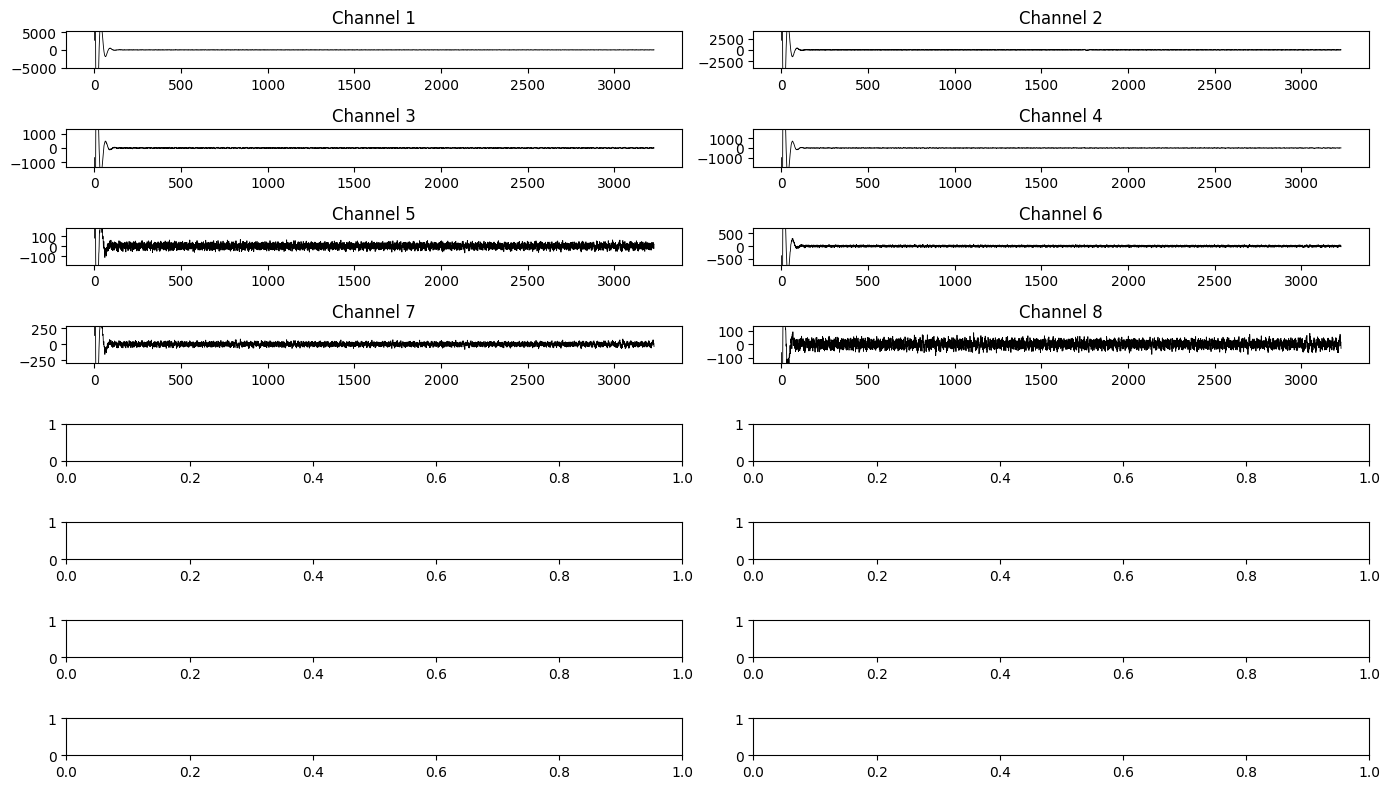

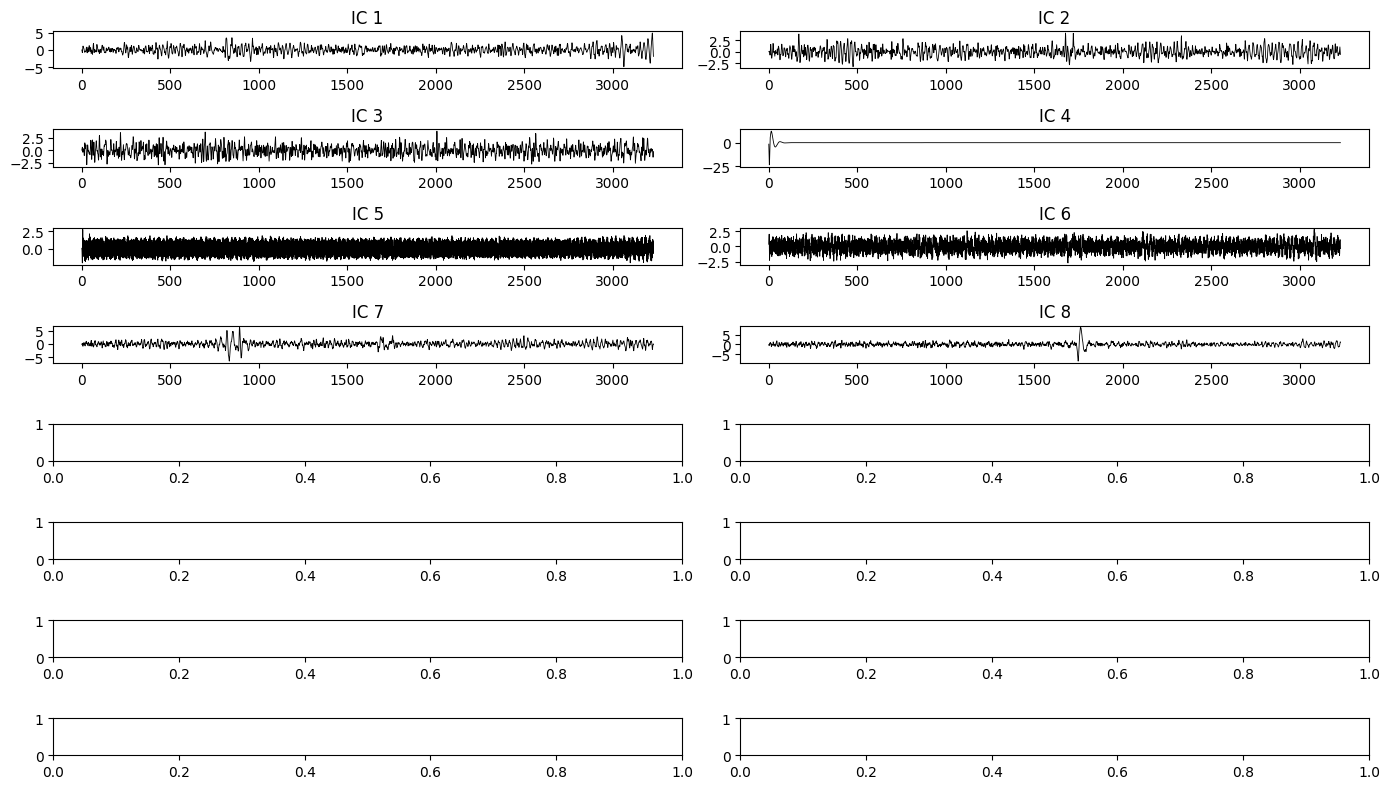

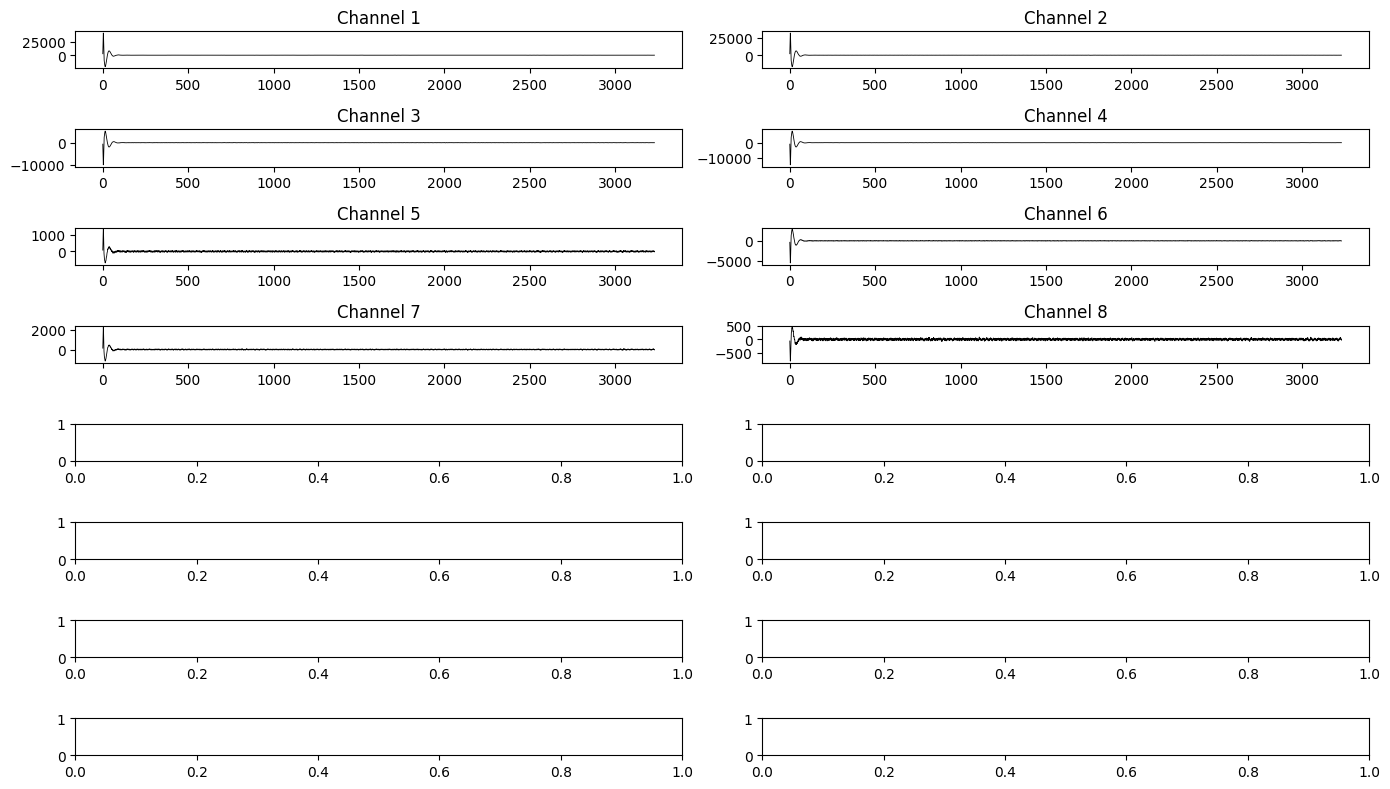

[[62716.37890625, 50025.9296875, -16289.7099609375, -24028.150390625, -639.5700073242188, -11710.76953125, 1243.449951171875, -2849.31005859375], [62979.05078125, 50449.6484375, -16529.4296875, -24190.890625, -958.3099975585938, -12037.2197265625, 903.8200073242188, -3174.260009765625], [63199.1796875, 50686.91015625, -16610.6796875, -24310.0, -1039.6199951171875, -12101.8798828125, 811.989990234375, -3269.77001953125], [62951.03125, 50272.359375, -16421.98046875, -24232.150390625, -766.75, -11805.099609375, 1085.9100341796875, -3015.699951171875], [62689.7109375, 49978.921875, -16293.6201171875, -24059.689453125, -643.77001953125, -11711.330078125, 1212.1099853515625, -2885.030029296875], [62930.23828125, 50373.76953125, -16487.849609375, -24156.689453125, -916.6500244140625, -11989.9404296875, 930.0800170898438, -3136.929931640625], [63221.37109375, 50724.0, -16601.359375, -24283.939453125, -1042.3299560546875, -12100.5400390625, 794.8699951171875, -3271.159912109375], [63042.3789062

[[62265.390625, 49910.96875, -16483.23046875, -24318.05078125, -1751.43994140625, -12720.669921875, 311.8999938964844, -3508.43994140625], [62534.55078125, 50334.0703125, -16693.98046875, -24459.5390625, -2026.9000244140625, -13004.2001953125, 19.09000015258789, -3788.1298828125], [62740.359375, 50540.8515625, -16754.689453125, -24561.859375, -2078.090087890625, -13037.1201171875, -32.04999923706055, -3848.280029296875], [62492.4296875, 50128.4609375, -16571.720703125, -24478.26953125, -1807.6099853515625, -12743.0400390625, 246.61000061035156, -3587.429931640625], [62259.48046875, 49884.328125, -16464.759765625, -24320.279296875, -1714.9599609375, -12687.7197265625, 345.0, -3486.9599609375], [62488.66015625, 50265.69921875, -16662.619140625, -24429.140625, -1987.199951171875, -12971.23046875, 65.0199966430664, -3754.739990234375], [62753.83984375, 50563.2890625, -16757.48046875, -24546.75, -2085.68994140625, -13055.900390625, -36.790000915527344, -3860.909912109375], [62560.828125, 50

[[62185.19140625, 49814.76953125, -16533.26953125, -24387.2890625, -1833.199951171875, -12789.26953125, 251.13999938964844, -3574.0], [62470.2890625, 50244.109375, -16718.23046875, -24490.560546875, -2092.8798828125, -13054.490234375, -24.989999771118164, -3835.60009765625], [62724.8515625, 50527.87890625, -16789.869140625, -24590.7890625, -2169.570068359375, -13107.3798828125, -105.37000274658203, -3912.340087890625], [62491.609375, 50146.109375, -16628.2890625, -24535.890625, -1927.18994140625, -12839.8896484375, 143.9199981689453, -3679.570068359375], [62205.53125, 49813.51953125, -16497.419921875, -24373.099609375, -1791.9599609375, -12734.5498046875, 288.760009765625, -3535.60009765625], [62408.66015625, 50159.26171875, -16689.490234375, -24471.630859375, -2058.18994140625, -13019.98046875, 7.150000095367432, -3802.929931640625], [62689.671875, 50495.828125, -16822.66015625, -24615.009765625, -2209.159912109375, -13163.4296875, -158.47000122070312, -3972.840087890625], [62552.3398

[[62183.5390625, 49828.25, -16514.33984375, -24398.44921875, -1863.72998046875, -12818.1201171875, 233.02000427246094, -3583.320068359375], [62412.98046875, 50206.91015625, -16707.73046875, -24502.51953125, -2135.14990234375, -13102.75, -50.97999954223633, -3855.5400390625], [62681.78125, 50522.1796875, -16804.0, -24617.470703125, -2249.610107421875, -13203.7802734375, -172.52999877929688, -3983.239990234375], [62512.69140625, 50206.80078125, -16660.6796875, -24583.25, -2023.77001953125, -12956.2099609375, 54.91999816894531, -3773.669921875], [62204.609375, 49826.078125, -16496.080078125, -24408.349609375, -1838.18994140625, -12785.509765625, 258.2300109863281, -3566.469970703125], [62372.05078125, 50134.37890625, -16637.16015625, -24445.740234375, -2060.52001953125, -13025.0498046875, 28.34000015258789, -3778.25], [62685.48828125, 50527.390625, -16777.580078125, -24577.529296875, -2228.219970703125, -13186.5703125, -152.3000030517578, -3960.10009765625], [62552.05078125, 50276.359375,

[[62150.16015625, 49786.80859375, -16542.66015625, -24448.16015625, -1934.0699462890625, -12865.6904296875, 176.2899932861328, -3615.889892578125], [62326.2890625, 50110.55078125, -16715.83984375, -24523.4609375, -2182.179931640625, -13130.7998046875, -79.41999816894531, -3854.090087890625], [62639.3515625, 50491.05078125, -16828.01953125, -24640.380859375, -2319.260009765625, -13258.759765625, -226.02000427246094, -4002.10009765625], [62514.26953125, 50240.30078125, -16715.80078125, -24636.740234375, -2127.820068359375, -13046.91015625, -32.720001220703125, -3825.2099609375], [62168.37890625, 49800.73046875, -16529.880859375, -24455.669921875, -1908.8599853515625, -12837.080078125, 196.8699951171875, -3596.889892578125], [62305.3515625, 50059.66015625, -16642.7109375, -24468.25, -2102.739990234375, -13062.900390625, -14.949999809265137, -3793.110107421875], [62609.109375, 50457.41015625, -16829.48046875, -24636.849609375, -2324.719970703125, -13276.4697265625, -243.33999633789062, -40

[[62614.5703125, 50457.58984375, -16816.08984375, -24675.140625, -2344.429931640625, -13266.3603515625, -257.9599914550781, -4001.1201171875], [62333.33984375, 50015.578125, -16624.8203125, -24577.130859375, -2061.89990234375, -12970.490234375, 40.65999984741211, -3730.10009765625], [62122.51953125, 49807.109375, -16555.19921875, -24441.650390625, -2013.5999755859375, -12960.48046875, 97.20999908447266, -3670.8701171875], [62384.51953125, 50219.25, -16739.380859375, -24547.44921875, -2272.389892578125, -13222.7099609375, -171.6199951171875, -3925.949951171875], [62606.33984375, 50471.1796875, -16839.220703125, -24669.169921875, -2366.56005859375, -13300.6103515625, -266.989990234375, -4030.56005859375], [62403.7890625, 50107.109375, -16675.609375, -24605.1796875, -2117.360107421875, -13021.6796875, -5.389999866485596, -3783.590087890625], [62140.6015625, 49802.75, -16535.080078125, -24435.98046875, -1978.8900146484375, -12913.6103515625, 144.91000366210938, -3635.469970703125], [62337.

[[62425.01953125, 50157.87109375, -16676.810546875, -24620.150390625, -2185.1298828125, -13075.900390625, -72.45999908447266, -3837.75], [62101.7890625, 49770.19921875, -16547.689453125, -24473.4609375, -2043.06005859375, -12958.490234375, 80.76000213623047, -3686.070068359375], [62268.0, 50086.83984375, -16710.279296875, -24540.669921875, -2285.780029296875, -13218.73046875, -168.02000427246094, -3923.199951171875], [62576.05078125, 50463.83984375, -16821.740234375, -24654.91015625, -2424.25, -13347.4296875, -320.42999267578125, -4076.179931640625], [62463.80078125, 50223.37890625, -16731.8203125, -24665.83984375, -2262.8701171875, -13162.3603515625, -157.1999969482422, -3929.570068359375], [62115.0, 49764.6796875, -16562.01953125, -24511.080078125, -2054.2099609375, -12973.7099609375, 59.9900016784668, -3720.27001953125], [62219.921875, 49997.25, -16678.0390625, -24528.01953125, -2246.72998046875, -13195.5302734375, -142.55999755859375, -3907.419921875], [62540.94140625, 50416.550781

[[62122.2890625, 49792.55078125, -16550.9296875, -24508.419921875, -2066.68994140625, -12970.9599609375, 80.52999877929688, -3678.340087890625], [62188.6796875, 49977.80078125, -16645.880859375, -24495.140625, -2234.7099609375, -13168.400390625, -95.05999755859375, -3835.9599609375], [62492.609375, 50387.94140625, -16837.390625, -24662.939453125, -2473.06005859375, -13404.76953125, -349.5799865722656, -4087.68994140625], [62513.98046875, 50334.7890625, -16783.6796875, -24691.390625, -2372.570068359375, -13273.0498046875, -246.6300048828125, -3993.27001953125], [62146.140625, 49826.37109375, -16587.859375, -24555.890625, -2106.699951171875, -13006.6796875, 35.40999984741211, -3725.3701171875], [62107.4296875, 49874.26953125, -16640.669921875, -24505.240234375, -2221.2900390625, -13156.4404296875, -81.0, -3831.669921875], [62456.71875, 50344.05859375, -16808.640625, -24632.5390625, -2450.6201171875, -13387.98046875, -332.1199951171875, -4080.360107421875], [62542.48046875, 50384.6484375,

[[62065.9609375, 49839.94140625, -16633.919921875, -24512.7109375, -2260.2099609375, -13161.5302734375, -112.44999694824219, -3840.830078125], [62405.12890625, 50305.55078125, -16793.470703125, -24621.2890625, -2479.989990234375, -13377.5400390625, -343.4100036621094, -4057.85009765625], [62538.41015625, 50407.26953125, -16830.94921875, -24716.419921875, -2489.159912109375, -13374.9697265625, -346.1400146484375, -4075.969970703125], [62235.7890625, 49961.359375, -16616.109375, -24589.060546875, -2188.820068359375, -13065.759765625, -30.489999771118164, -3781.85009765625], [62051.12109375, 49805.46875, -16570.259765625, -24471.9609375, -2171.429931640625, -13090.8798828125, -6.860000133514404, -3755.030029296875], [62367.01953125, 50256.83984375, -16732.650390625, -24563.25, -2404.580078125, -13326.1796875, -254.32000732421875, -3988.68994140625], [62570.671875, 50468.62890625, -16814.609375, -24682.740234375, -2481.449951171875, -13389.0498046875, -337.3800048828125, -4078.570068359375

[[62413.5390625, 50240.66015625, -16743.359375, -24673.349609375, -2411.840087890625, -13288.7998046875, -268.94000244140625, -3981.159912109375], [62061.94140625, 49760.078125, -16551.640625, -24516.779296875, -2163.469970703125, -13048.080078125, -7.400000095367432, -3730.0400390625], [62088.01953125, 49898.19140625, -16656.3203125, -24517.98046875, -2341.050048828125, -13249.6396484375, -185.2100067138672, -3885.199951171875], [62420.078125, 50332.26171875, -16829.630859375, -24659.19921875, -2558.97998046875, -13458.1201171875, -413.260009765625, -4104.02978515625], [62440.26953125, 50280.94140625, -16826.41015625, -24737.369140625, -2508.110107421875, -13381.650390625, -357.989990234375, -4061.449951171875], [62102.83984375, 49793.46875, -16612.349609375, -24591.4609375, -2222.52001953125, -13096.8701171875, -59.95000076293945, -3781.0], [62072.7109375, 49837.5, -16620.689453125, -24495.66015625, -2288.1298828125, -13198.6796875, -125.58999633789062, -3835.449951171875], [62382.42

[[62113.3515625, 49840.98828125, -16615.8203125, -24621.359375, -2269.280029296875, -13123.5400390625, -101.38999938964844, -3820.0]]
[[62007.05078125, 49788.9296875, -16613.98046875, -24535.640625, -2318.3701171875, -13216.4501953125, -149.5800018310547, -3868.35009765625], [62325.87109375, 50238.16015625, -16802.5703125, -24664.900390625, -2570.610107421875, -13461.990234375, -418.79998779296875, -4121.35009765625], [62455.9296875, 50351.23828125, -16857.7109375, -24772.5703125, -2603.02001953125, -13464.4404296875, -446.07000732421875, -4138.10986328125], [62181.859375, 49916.94140625, -16655.2890625, -24665.189453125, -2311.219970703125, -13158.5595703125, -135.52000427246094, -3848.320068359375], [62014.328125, 49762.48828125, -16573.94921875, -24515.41015625, -2256.1201171875, -13145.080078125, -73.91999816894531, -3786.52001953125], [62265.76953125, 50166.96875, -16766.310546875, -24628.5390625, -2515.169921875, -13409.3701171875, -343.1700134277344, -4044.659912109375], [62482.

[[61978.4609375, 49747.578125, -16585.91015625, -24538.060546875, -2281.0, -13193.3203125, -83.30000305175781, -3800.820068359375], [62230.2890625, 50139.140625, -16763.740234375, -24629.5390625, -2530.1298828125, -13455.2802734375, -345.4200134277344, -4052.47998046875], [62456.87890625, 50406.51171875, -16864.83984375, -24757.75, -2650.85009765625, -13551.349609375, -465.8599853515625, -4167.240234375], [62288.76953125, 50091.109375, -16701.599609375, -24700.310546875, -2412.39990234375, -13282.900390625, -221.22000122070312, -3941.14990234375], [62009.3515625, 49759.80859375, -16538.4609375, -24508.890625, -2246.909912109375, -13139.2900390625, -46.5099983215332, -3765.169921875], [62166.73046875, 50061.48828125, -16724.599609375, -24595.4609375, -2515.7099609375, -13422.9599609375, -332.4200134277344, -4030.31005859375], [62469.609375, 50436.01953125, -16848.2109375, -24722.9296875, -2669.179931640625, -13559.2802734375, -502.8699951171875, -4196.31982421875], [62322.71875, 50169.4

[[62132.4609375, 50014.171875, -16713.939453125, -24610.970703125, -2523.889892578125, -13433.150390625, -339.8800048828125, -4027.449951171875], [62420.2890625, 50388.0, -16867.880859375, -24754.240234375, -2708.27001953125, -13605.8603515625, -533.5599975585938, -4217.39013671875], [62313.7109375, 50180.25, -16805.05078125, -24788.330078125, -2581.1298828125, -13448.419921875, -398.4200134277344, -4096.93994140625], [61996.76171875, 49743.16015625, -16585.369140625, -24594.16015625, -2310.919921875, -13191.0400390625, -116.5, -3824.64990234375], [62071.30078125, 49932.75, -16686.400390625, -24592.099609375, -2485.85009765625, -13392.740234375, -291.489990234375, -3981.449951171875], [62400.0390625, 50365.921875, -16853.0390625, -24732.880859375, -2708.3798828125, -13595.1298828125, -519.030029296875, -4199.22021484375], [62387.76171875, 50276.1796875, -16832.580078125, -24794.48046875, -2629.659912109375, -13499.7197265625, -446.5199890136719, -4139.25], [62041.98046875, 49798.03125,

[[62351.51171875, 50315.921875, -16865.2890625, -24738.279296875, -2749.1298828125, -13642.5, -580.0900268554688, -4237.759765625]]
[[62390.87109375, 50294.171875, -16849.060546875, -24797.900390625, -2685.989990234375, -13554.8798828125, -513.7999877929688, -4181.77001953125], [62064.26953125, 49811.53125, -16643.130859375, -24663.359375, -2403.889892578125, -13266.6796875, -218.85000610351562, -3900.219970703125], [61994.640625, 49821.12109375, -16649.810546875, -24578.7109375, -2467.719970703125, -13363.6796875, -283.30999755859375, -3950.31005859375], [62309.9296875, 50268.62890625, -16820.939453125, -24689.630859375, -2700.68994140625, -13590.240234375, -529.5599975585938, -4183.259765625], [62422.26953125, 50347.69921875, -16876.880859375, -24802.720703125, -2729.639892578125, -13595.9599609375, -558.6599731445312, -4217.89013671875], [62131.94921875, 49901.921875, -16683.390625, -24696.599609375, -2452.22998046875, -13300.990234375, -266.7900085449219, -3942.64990234375], [61974

[[62037.01953125, 49909.71875, -16708.259765625, -24619.869140625, -2586.860107421875, -13484.830078125, -396.7699890136719, -4061.510009765625], [62378.078125, 50366.171875, -16851.1796875, -24737.140625, -2780.0400390625, -13665.9501953125, -602.5399780273438, -4254.990234375], [62368.921875, 50283.53125, -16846.400390625, -24816.9609375, -2723.27001953125, -13585.080078125, -543.9299926757812, -4209.009765625], [62022.80078125, 49784.78125, -16633.099609375, -24665.529296875, -2443.25, -13303.669921875, -245.60000610351562, -3929.3701171875], [61981.5390625, 49827.1796875, -16676.4609375, -24608.509765625, -2538.60009765625, -13441.08984375, -346.5899963378906, -4015.739990234375], [62301.26171875, 50278.640625, -16854.529296875, -24736.740234375, -2769.97998046875, -13657.759765625, -587.0499877929688, -4231.5], [62373.75, 50304.33984375, -16876.369140625, -24827.759765625, -2757.68994140625, -13616.76953125, -568.3400268554688, -4217.06005859375], [62053.890625, 49828.16015625, -1

[[62252.46875, 50228.69921875, -16858.759765625, -24747.33984375, -2789.2099609375, -13681.66015625, -579.4000244140625, -4214.330078125], [62377.140625, 50332.30078125, -16902.080078125, -24842.599609375, -2810.419921875, -13674.73046875, -605.4600219726562, -4244.60009765625], [62084.828125, 49880.83984375, -16715.439453125, -24750.130859375, -2549.530029296875, -13393.3203125, -344.9800109863281, -3993.590087890625], [61940.73046875, 49760.12109375, -16641.390625, -24605.16015625, -2510.43994140625, -13392.2001953125, -301.6400146484375, -3948.89990234375], [62215.25, 50177.1796875, -16821.05078125, -24712.0703125, -2758.179931640625, -13644.150390625, -547.72998046875, -4188.43017578125], [62371.55859375, 50354.58984375, -16917.740234375, -24845.66015625, -2850.0, -13714.669921875, -636.9400024414062, -4280.6298828125], [62137.80078125, 49961.7109375, -16739.560546875, -24773.240234375, -2588.909912109375, -13430.1298828125, -370.4599914550781, -4026.2900390625], [61897.30078125, 4

[[62359.9296875, 50360.2890625, -16919.73046875, -24841.7890625, -2905.8798828125, -13762.73046875, -692.4299926757812, -4288.31982421875], [62149.140625, 49998.171875, -16762.240234375, -24787.4609375, -2665.110107421875, -13490.98046875, -443.1000061035156, -4048.679931640625], [61874.609375, 49687.2109375, -16611.390625, -24603.099609375, -2510.590087890625, -13360.4599609375, -283.5299987792969, -3885.2900390625], [62095.91015625, 50047.5390625, -16776.7890625, -24671.740234375, -2757.669921875, -13617.509765625, -544.530029296875, -4128.77001953125], [62373.55078125, 50389.7890625, -16901.9609375, -24803.259765625, -2902.280029296875, -13747.98046875, -701.0800170898438, -4286.7099609375], [62238.48046875, 50122.76171875, -16796.380859375, -24800.109375, -2721.300048828125, -13541.1796875, -518.469970703125, -4121.47998046875], [61898.23828125, 49689.62890625, -16629.7890625, -24641.94921875, -2525.22998046875, -13371.240234375, -314.239990234375, -3927.070068359375], [62002.85937

[[62142.140625, 50129.078125, -16869.060546875, -24767.990234375, -2880.739990234375, -13760.1396484375, -650.2999877929688, -4242.2900390625], [62342.96875, 50341.1796875, -16938.060546875, -24876.279296875, -2946.610107421875, -13811.1904296875, -725.4299926757812, -4325.6201171875], [62133.91015625, 49979.0390625, -16743.1796875, -24784.349609375, -2667.030029296875, -13508.919921875, -439.95001220703125, -4054.830078125], [61883.078125, 49703.328125, -16634.55078125, -24630.6796875, -2566.85009765625, -13432.349609375, -325.1499938964844, -3924.989990234375], [62121.109375, 50090.3203125, -16793.939453125, -24701.4296875, -2803.239990234375, -13676.580078125, -573.8599853515625, -4154.759765625]]
[[62366.4609375, 50384.4296875, -16912.1796875, -24837.6796875, -2935.659912109375, -13792.33984375, -715.1900024414062, -4294.330078125], [62185.140625, 50066.30078125, -16790.16015625, -24815.83984375, -2732.080078125, -13557.7900390625, -503.20001220703125, -4097.14013671875], [61877.46

[[62345.33984375, 50350.41015625, -16934.490234375, -24859.970703125, -3007.469970703125, -13868.2099609375, -792.5700073242188, -4354.27978515625], [62229.37890625, 50104.5390625, -16809.5390625, -24836.029296875, -2803.93994140625, -13637.3603515625, -581.530029296875, -4161.0498046875], [61881.08984375, 49669.328125, -16641.5, -24675.990234375, -2602.1201171875, -13460.3798828125, -367.3999938964844, -3955.860107421875], [62005.28125, 49929.55078125, -16779.609375, -24706.970703125, -2821.300048828125, -13694.599609375, -597.02001953125, -4162.7900390625], [62332.37890625, 50351.73046875, -16905.830078125, -24816.130859375, -2993.570068359375, -13843.1904296875, -773.0599975585938, -4328.240234375], [62274.109375, 50193.609375, -16836.58984375, -24842.580078125, -2855.659912109375, -13683.849609375, -635.0599975585938, -4205.080078125], [61922.3984375, 49713.58984375, -16650.689453125, -24699.66015625, -2609.409912109375, -13457.25, -387.3299865722656, -3969.93994140625], [61963.480

[[62258.171875, 50203.19921875, -16894.69921875, -24895.390625, -2930.830078125, -13775.25, -694.27001953125, -4268.97998046875], [61899.23828125, 49710.37109375, -16699.029296875, -24755.3203125, -2670.830078125, -13520.3896484375, -424.3699951171875, -4013.77001953125], [61894.5703125, 49817.2109375, -16723.75, -24669.8203125, -2764.39990234375, -13640.73046875, -520.9099731445312, -4093.6298828125], [62213.0390625, 50257.48828125, -16914.060546875, -24817.900390625, -3012.550048828125, -13881.6796875, -786.489990234375, -4346.81005859375], [62276.8984375, 50265.140625, -16938.080078125, -24914.419921875, -2999.889892578125, -13847.2001953125, -778.7100219726562, -4349.10986328125], [61939.7890625, 49770.578125, -16739.419921875, -24799.48046875, -2730.489990234375, -13573.0703125, -503.3399963378906, -4092.179931640625], [61849.640625, 49743.76171875, -16709.16015625, -24682.609375, -2753.489990234375, -13630.849609375, -526.25, -4099.64990234375], [62174.55078125, 50200.0, -16881.3

[[61978.5, 49838.671875, -16727.310546875, -24800.359375, -2752.0400390625, -13579.8701171875, -514.0499877929688, -4094.909912109375], [61832.2109375, 49731.87109375, -16705.1796875, -24693.130859375, -2773.02001953125, -13624.8203125, -531.8800048828125, -4090.840087890625], [62134.80859375, 50172.3984375, -16881.01953125, -24802.859375, -3020.43994140625, -13870.5302734375, -789.7100219726562, -4332.5498046875], [62313.1796875, 50348.69140625, -16949.55078125, -24915.150390625, -3071.760009765625, -13905.599609375, -836.8300170898438, -4388.6298828125], [62051.41015625, 49924.25, -16774.44921875, -24838.779296875, -2807.9599609375, -13619.2802734375, -558.7899780273438, -4123.7900390625], [61819.08984375, 49680.44140625, -16677.439453125, -24684.259765625, -2724.050048828125, -13564.2001953125, -466.4599914550781, -4019.199951171875], [62072.1796875, 50076.87109375, -16852.05078125, -24775.810546875, -2974.989990234375, -13822.0, -734.6300048828125, -4269.0498046875], [62309.53125, 

[[61775.55078125, 49653.53125, -16685.060546875, -24702.4296875, -2772.0400390625, -13612.349609375, -521.5599975585938, -4061.31005859375], [62003.6484375, 50023.46875, -16853.130859375, -24780.5703125, -3019.64990234375, -13869.2998046875, -785.780029296875, -4303.18017578125], [62271.109375, 50336.80078125, -16974.2890625, -24913.51953125, -3152.510009765625, -13982.7998046875, -918.25, -4429.7099609375], [62098.9296875, 50034.6015625, -16854.470703125, -24897.2890625, -2941.669921875, -13745.669921875, -680.4299926757812, -4213.259765625], [61763.12109375, 49622.69921875, -16696.220703125, -24736.119140625, -2756.77001953125, -13584.9404296875, -484.8500061035156, -4029.550048828125], [61913.0390625, 49912.51953125, -16831.400390625, -24766.740234375, -2967.889892578125, -13820.259765625, -708.75, -4239.009765625], [62232.98046875, 50307.46875, -16966.560546875, -24890.58984375, -3132.530029296875, -13977.8896484375, -885.4000244140625, -4416.31982421875], [62156.4609375, 50114.128

[[61908.140625, 49879.30078125, -16821.560546875, -24762.470703125, -2979.39990234375, -13835.5703125, -713.239990234375, -4249.56005859375], [62237.12890625, 50297.078125, -16954.310546875, -24874.5, -3144.260009765625, -13997.73046875, -877.0999755859375, -4428.169921875], [62166.58984375, 50131.26953125, -16910.529296875, -24925.140625, -3038.64990234375, -13863.669921875, -757.0999755859375, -4324.93017578125], [61797.76953125, 49638.30078125, -16733.5703125, -24793.1796875, -2804.179931640625, -13633.25, -513.3499755859375, -4087.39990234375], [61835.0703125, 49785.828125, -16807.599609375, -24752.33984375, -2951.989990234375, -13805.080078125, -666.1699829101562, -4217.64013671875], [62162.609375, 50226.73828125, -16966.779296875, -24883.390625, -3169.830078125, -14016.0, -900.0999755859375, -4436.419921875], [62192.26953125, 50190.75, -16955.0703125, -24956.859375, -3118.27001953125, -13938.75, -847.0, -4391.2001953125], [61872.19921875, 49721.3203125, -16744.990234375, -24820.8

[[61747.4296875, 49646.83984375, -16711.419921875, -24747.19921875, -2838.25, -13667.169921875, -562.010009765625, -4096.669921875], [61873.671875, 49917.83984375, -16863.69921875, -24793.01953125, -3068.090087890625, -13905.26953125, -786.6900024414062, -4293.47998046875], [62165.5390625, 50284.41015625, -17004.01953125, -24923.0390625, -3239.800048828125, -14062.9599609375, -966.3599853515625, -4469.8798828125], [62091.671875, 50088.7109375, -16915.91015625, -24936.94921875, -3081.929931640625, -13887.0, -806.969970703125, -4329.7099609375], [61761.8515625, 49645.37109375, -16723.279296875, -24772.880859375, -2838.68994140625, -13657.650390625, -548.0900268554688, -4082.679931640625], [61827.25, 49828.26953125, -16824.740234375, -24771.58984375, -3016.3701171875, -13868.740234375, -737.52001953125, -4259.0400390625], [62155.890625, 50261.37890625, -16978.58984375, -24898.259765625, -3213.0, -14057.8603515625, -953.280029296875, -4466.75], [62148.62109375, 50187.55078125, -16940.69921

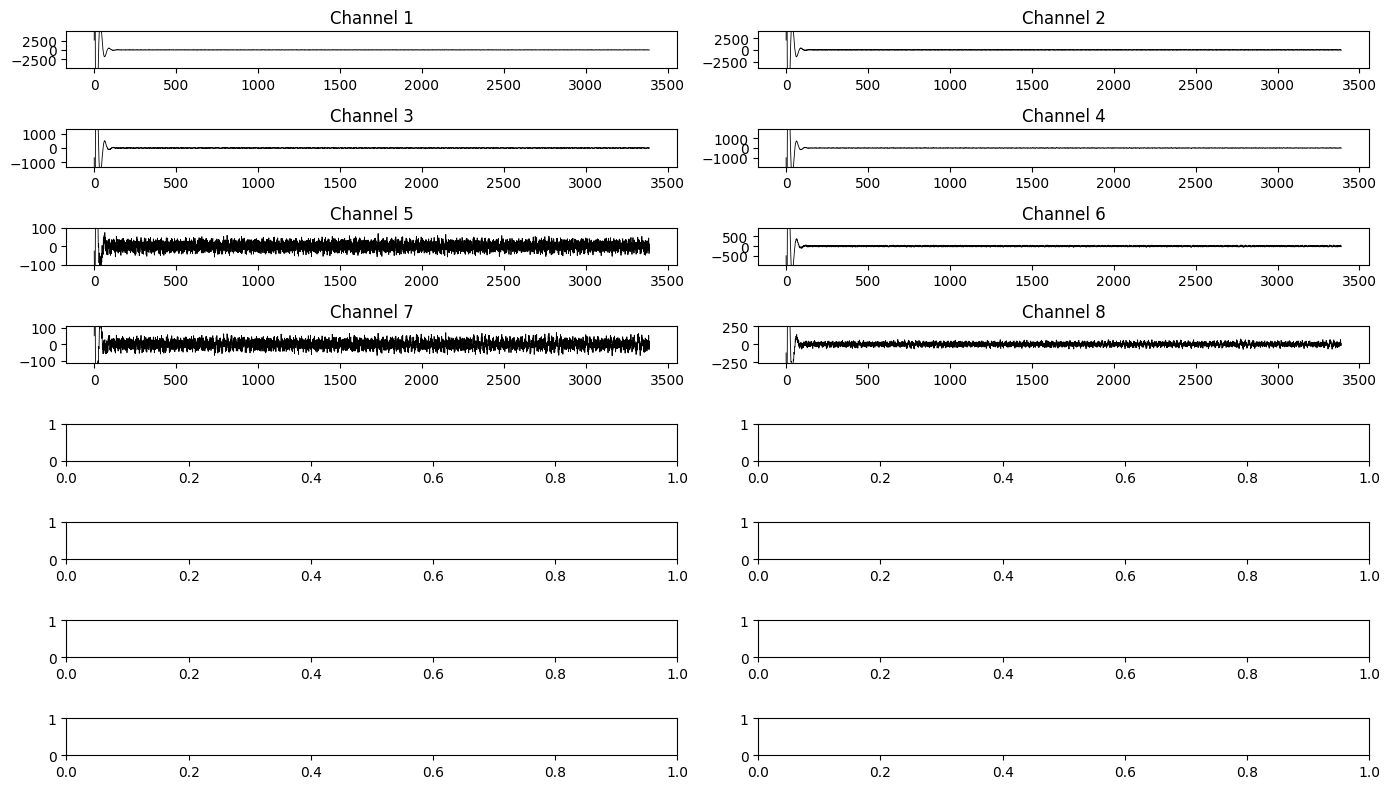

/Users/admin/anaconda3/envs/goo/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


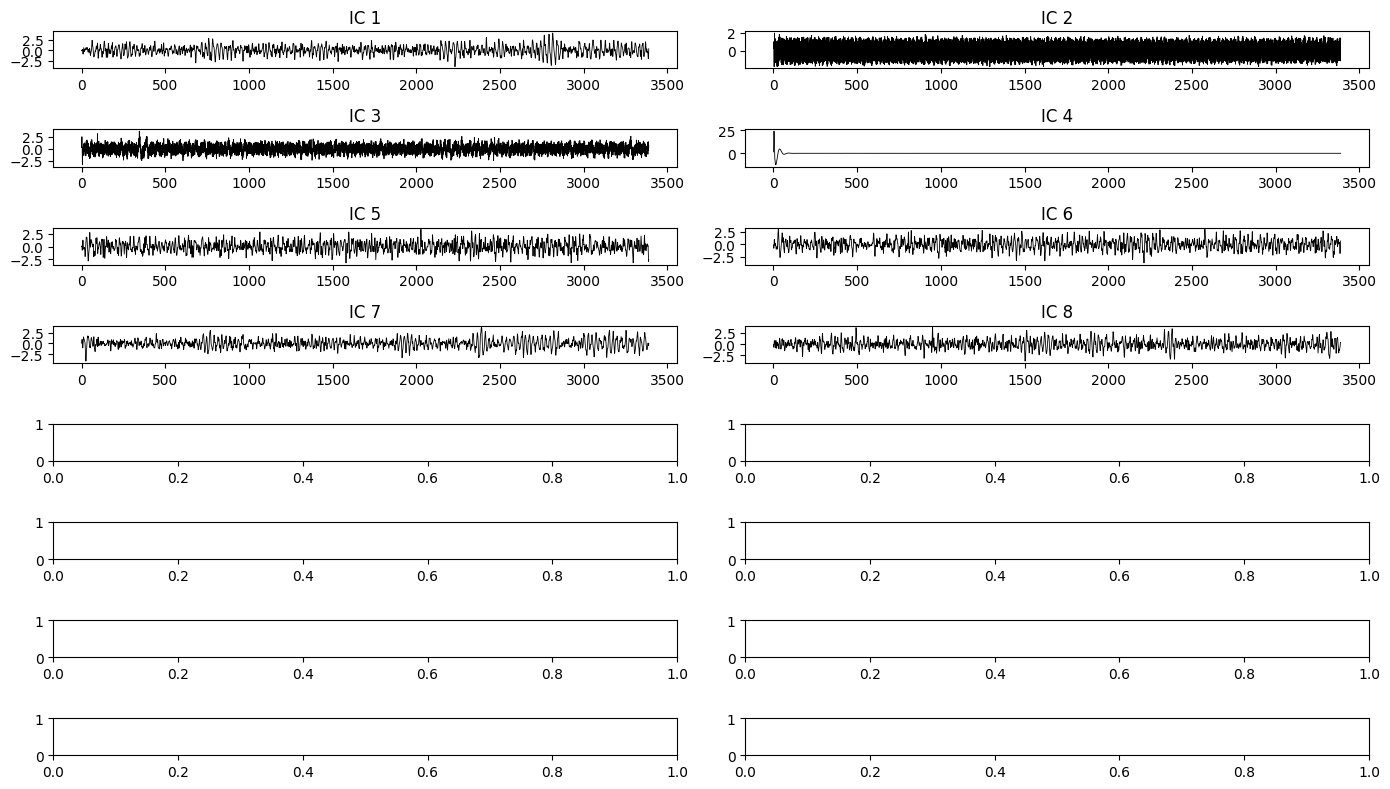

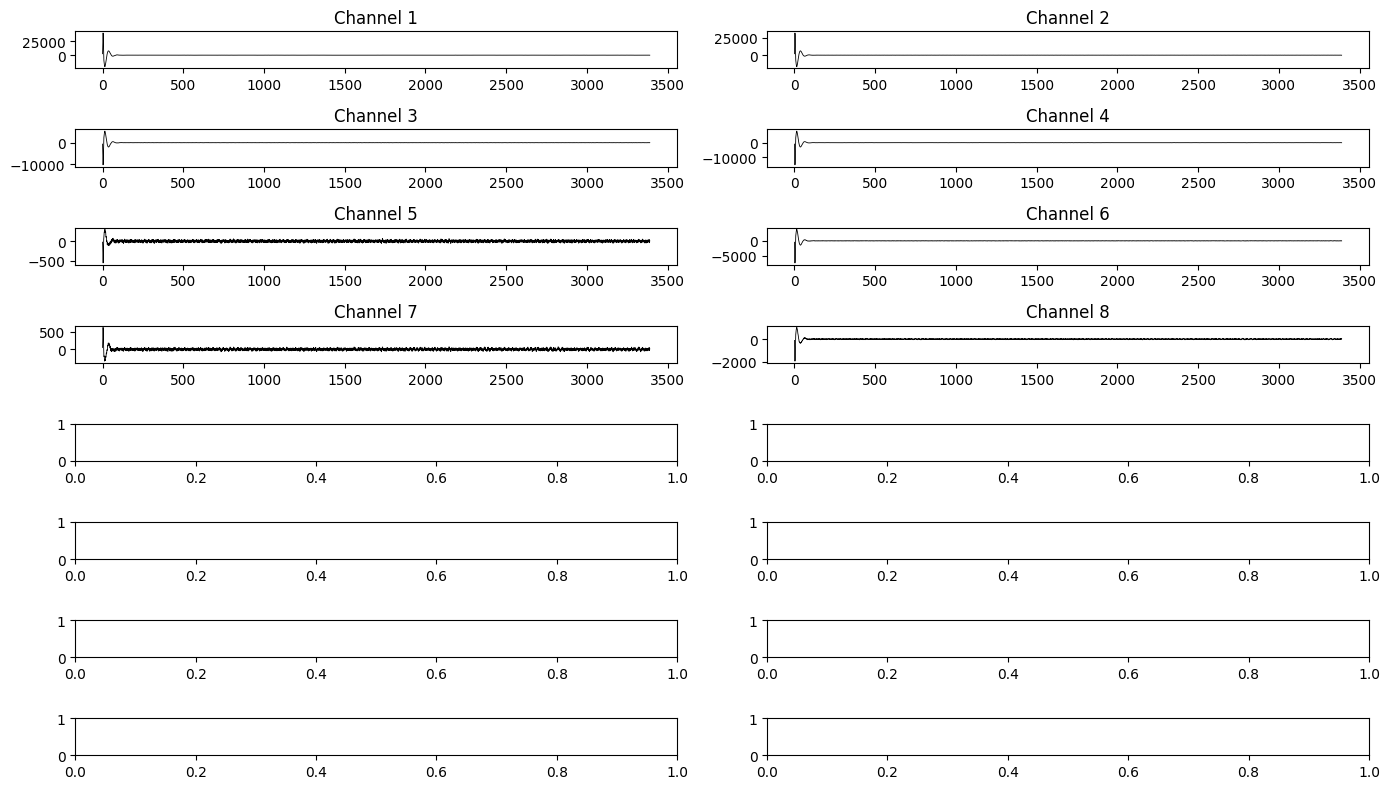

[[62010.83984375, 49960.83984375, -16862.490234375, -24924.51953125, -3024.280029296875, -13829.16015625, -752.9000244140625, -4262.9501953125], [61704.4296875, 49597.48828125, -16733.23046875, -24780.55078125, -2886.18994140625, -13726.41015625, -614.27001953125, -4128.75], [61879.8203125, 49913.03125, -16894.880859375, -24846.060546875, -3123.389892578125, -13986.1103515625, -872.9199829101562, -4375.14990234375], [62176.71875, 50269.58984375, -17008.19921875, -24967.140625, -3261.699951171875, -14115.349609375, -1019.6199951171875, -4523.4599609375], [62065.2890625, 50031.0, -16907.189453125, -24964.76953125, -3078.14990234375, -13908.76953125, -819.6799926757812, -4344.60009765625], [61726.51171875, 49604.12890625, -16729.5, -24789.890625, -2857.68994140625, -13699.990234375, -578.8400268554688, -4111.85009765625], [61820.03125, 49830.78125, -16857.98046875, -24811.529296875, -3065.010009765625, -13928.330078125, -796.2999877929688, -4312.5498046875], [62136.28125, 50238.2890625, -

[[61712.94140625, 49693.46875, -17085.580078125, -25348.0390625, -4027.2900390625, -14627.2900390625, -1611.8499755859375, -4792.77001953125], [61370.48828125, 49264.08984375, -16925.33984375, -25199.599609375, -3828.320068359375, -14439.2900390625, -1396.31005859375, -4574.419921875], [61459.5, 49479.8984375, -17038.310546875, -25207.220703125, -4017.949951171875, -14654.0498046875, -1604.6099853515625, -4762.06005859375], [61785.19921875, 49883.73046875, -17165.599609375, -25318.5390625, -4185.06982421875, -14811.580078125, -1786.43994140625, -4937.22998046875], [61770.921875, 49779.66015625, -17082.4296875, -25333.73046875, -4036.8798828125, -14643.8095703125, -1624.0999755859375, -4795.77001953125]]
[[61431.19921875, 49325.78125, -16899.099609375, -25192.900390625, -3790.10009765625, -14407.83984375, -1356.8599853515625, -4550.4599609375], [61456.66015625, 49449.41015625, -16960.970703125, -25151.009765625, -3924.8798828125, -14574.75, -1494.4200439453125, -4675.740234375], [61769.

[[61464.51953125, 49379.01953125, -16916.689453125, -25215.490234375, -3843.070068359375, -14433.8798828125, -1396.449951171875, -4551.43994140625], [61429.2109375, 49429.2890625, -16962.720703125, -25158.69921875, -3957.510009765625, -14578.2998046875, -1516.280029296875, -4654.9501953125], [61726.9296875, 49840.23046875, -17135.380859375, -25287.130859375, -4192.64990234375, -14806.7802734375, -1767.8399658203125, -4894.33984375], [61794.98828125, 49861.01953125, -17150.810546875, -25373.2109375, -4173.5400390625, -14771.2802734375, -1747.6600341796875, -4887.919921875], [61494.33984375, 49413.78125, -16973.380859375, -25281.5, -3916.050048828125, -14510.5498046875, -1488.3599853515625, -4649.6298828125], [61392.9296875, 49359.359375, -16946.779296875, -25172.220703125, -3939.699951171875, -14569.8095703125, -1515.5799560546875, -4662.22021484375], [61687.75, 49783.73046875, -17101.810546875, -25263.970703125, -4160.83984375, -14785.16015625, -1746.989990234375, -4872.18994140625], [

[[61377.01953125, 49328.80078125, -16909.3203125, -25139.26953125, -3904.780029296875, -14527.0703125, -1474.9200439453125, -4592.66015625], [61639.359375, 49726.390625, -17080.349609375, -25239.279296875, -4145.2001953125, -14772.2001953125, -1727.719970703125, -4828.10986328125], [61822.9296875, 49919.8515625, -17159.75, -25356.869140625, -4217.7998046875, -14829.6904296875, -1803.1600341796875, -4911.5], [61608.9609375, 49562.3984375, -17004.220703125, -25302.330078125, -3973.219970703125, -14570.23046875, -1550.699951171875, -4685.64013671875], [61375.46875, 49307.05078125, -16886.939453125, -25145.73046875, -3865.97998046875, -14501.0703125, -1435.6700439453125, -4576.2099609375], [61597.109375, 49657.44140625, -17038.0390625, -25214.240234375, -4099.330078125, -14745.509765625, -1682.4200439453125, -4810.0498046875], [61845.51171875, 49946.16015625, -17144.859375, -25338.0703125, -4220.85986328125, -14852.08984375, -1813.199951171875, -4940.72021484375], [61686.41015625, 49656.85

[[61572.62109375, 49623.19921875, -17036.390625, -25233.0390625, -4130.7998046875, -14770.41015625, -1716.0999755859375, -4836.22021484375], [61849.26953125, 49962.71875, -17143.23046875, -25342.16015625, -4258.0498046875, -14883.509765625, -1850.2099609375, -4968.5498046875], [61711.4609375, 49705.3203125, -17074.25, -25371.380859375, -4113.97021484375, -14713.83984375, -1702.800048828125, -4835.39990234375], [61396.3515625, 49303.51953125, -16912.25, -25219.1796875, -3920.22998046875, -14543.6298828125, -1501.8399658203125, -4642.2099609375], [61522.28125, 49555.109375, -17002.76953125, -25205.3203125, -4093.47998046875, -14739.76953125, -1680.760009765625, -4805.22021484375], [61818.21875, 49932.58984375, -17137.890625, -25322.16015625, -4268.97998046875, -14900.2099609375, -1863.530029296875, -4981.18017578125], [61769.51171875, 49784.98046875, -17087.76953125, -25362.4609375, -4158.1201171875, -14755.9697265625, -1744.239990234375, -4868.75], [61458.2890625, 49361.12109375, -16879

[[61840.8203125, 49962.69921875, -17107.890625, -25306.169921875, -4286.52978515625, -14911.51953125, -1891.1800537109375, -4978.60009765625], [61811.359375, 49858.69921875, -17108.51953125, -25388.25, -4233.06005859375, -14827.6796875, -1830.0699462890625, -4921.5400390625], [61504.87109375, 49418.7890625, -16894.369140625, -25231.51953125, -3949.530029296875, -14544.9501953125, -1524.4100341796875, -4630.7900390625], [61485.30859375, 49484.859375, -16929.69921875, -25164.490234375, -4052.800048828125, -14685.26953125, -1631.969970703125, -4728.10986328125], [61796.33984375, 49910.80078125, -17086.880859375, -25277.16015625, -4268.3798828125, -14893.349609375, -1860.219970703125, -4945.18994140625], [61858.7890625, 49930.6015625, -17099.130859375, -25358.33984375, -4246.31982421875, -14847.4404296875, -1835.550048828125, -4927.81982421875], [61563.73828125, 49487.609375, -16915.439453125, -25255.369140625, -3985.2900390625, -14576.7998046875, -1561.8699951171875, -4669.52001953125], [

[[61834.8515625, 49892.08984375, -17147.0703125, -25409.529296875, -4335.7001953125, -14920.5302734375, -1914.52001953125, -4984.56982421875], [61552.80859375, 49460.0, -16981.1796875, -25337.470703125, -4084.5400390625, -14658.919921875, -1650.989990234375, -4738.02978515625], [61420.80078125, 49347.7109375, -16913.1796875, -25193.830078125, -4052.7099609375, -14662.0498046875, -1611.68994140625, -4691.41015625], [61685.359375, 49746.69140625, -17076.220703125, -25284.08984375, -4289.009765625, -14899.650390625, -1860.5799560546875, -4925.740234375], [61855.75, 49928.51953125, -17155.3203125, -25400.810546875, -4361.81005859375, -14954.25, -1937.8699951171875, -5006.14013671875], [61647.5, 49572.6796875, -16995.83984375, -25341.759765625, -4116.830078125, -14685.58984375, -1688.719970703125, -4772.47998046875], [61422.7890625, 49331.23828125, -16895.5703125, -25192.25, -4031.2900390625, -14632.990234375, -1601.300048828125, -4684.89990234375]]
[[61632.609375, 49674.1796875, -17062.720

[[61650.3984375, 49587.9296875, -17005.009765625, -25354.990234375, -4168.509765625, -14724.5703125, -1727.050048828125, -4786.669921875], [61367.25, 49261.390625, -16897.16015625, -25218.599609375, -4059.570068359375, -14643.9697265625, -1613.550048828125, -4675.6298828125], [61569.421875, 49594.37890625, -17034.130859375, -25261.470703125, -4274.47998046875, -14871.3798828125, -1837.0, -4880.3701171875], [61839.30078125, 49920.73828125, -17150.580078125, -25381.23046875, -4407.919921875, -14994.0, -1978.550048828125, -5019.77978515625], [61710.66015625, 49676.9296875, -17056.640625, -25381.7890625, -4233.080078125, -14790.509765625, -1799.56005859375, -4854.83984375], [61386.2890625, 49268.0703125, -16907.55078125, -25234.26953125, -4055.300048828125, -14627.5595703125, -1605.699951171875, -4663.330078125], [61507.328125, 49514.2109375, -17011.169921875, -25233.869140625, -4236.259765625, -14825.2197265625, -1788.8299560546875, -4824.419921875], [61805.7890625, 49895.55078125, -17145

[[61358.05859375, 49223.69921875, -16909.9609375, -25259.880859375, -4080.68994140625, -14635.6796875, -1633.1500244140625, -4672.85986328125], [61410.25, 49393.0, -17011.380859375, -25255.58984375, -4259.93017578125, -14842.0, -1822.449951171875, -4845.66015625], [61728.609375, 49806.4609375, -17138.419921875, -25354.919921875, -4430.2099609375, -15001.5302734375, -2003.9200439453125, -5020.669921875], [61718.8203125, 49719.9296875, -17118.80078125, -25424.6796875, -4356.490234375, -14908.8798828125, -1928.02001953125, -4961.83984375], [61377.890625, 49252.01953125, -16954.490234375, -25314.939453125, -4126.1298828125, -14680.599609375, -1684.719970703125, -4733.56005859375], [61341.30078125, 49303.51953125, -17013.970703125, -25270.3203125, -4254.740234375, -14838.0498046875, -1812.2099609375, -4843.85009765625], [61660.140625, 49734.1484375, -17148.55078125, -25367.310546875, -4446.47998046875, -15023.3701171875, -2018.22998046875, -5041.97021484375], [61739.6484375, 49765.73046875,

[[61310.12109375, 49250.51953125, -16989.759765625, -25254.5390625, -4238.14013671875, -14819.759765625, -1764.9200439453125, -4790.06982421875], [61608.76171875, 49669.0390625, -17160.439453125, -25370.970703125, -4474.52978515625, -15047.169921875, -2021.2900390625, -5026.6201171875], [61730.109375, 49761.51171875, -17190.55078125, -25461.380859375, -4479.0400390625, -15025.2900390625, -2031.1300048828125, -5032.9599609375], [61446.01953125, 49328.26953125, -17022.330078125, -25385.369140625, -4228.97021484375, -14765.41015625, -1777.4599609375, -4791.2998046875], [61275.6484375, 49193.9296875, -16986.970703125, -25275.599609375, -4233.509765625, -14803.3095703125, -1774.6600341796875, -4779.43017578125], [61549.73046875, 49597.08984375, -17140.94921875, -25360.98046875, -4457.7001953125, -15027.349609375, -2008.8900146484375, -4995.7001953125], [61742.73046875, 49798.140625, -17181.25, -25445.669921875, -4493.10009765625, -15046.7197265625, -2048.81005859375, -5038.56982421875], [61

[[61503.41015625, 49544.16015625, -17123.689453125, -25340.779296875, -4474.169921875, -15022.740234375, -2011.47998046875, -4989.0400390625], [61689.7890625, 49758.19921875, -17229.859375, -25473.140625, -4579.9599609375, -15112.2099609375, -2119.280029296875, -5097.580078125], [61482.8515625, 49414.828125, -17104.810546875, -25453.7890625, -4369.81005859375, -14877.66015625, -1899.3599853515625, -4896.91015625], [61278.0703125, 49164.5390625, -16931.2890625, -25256.060546875, -4197.22998046875, -14738.8701171875, -1723.699951171875, -4725.919921875], [61474.08984375, 49491.75, -17076.439453125, -25309.060546875, -4428.7998046875, -14984.0498046875, -1969.699951171875, -4957.009765625], [61724.71875, 49797.69921875, -17184.2890625, -25428.599609375, -4555.7099609375, -15104.2099609375, -2104.080078125, -5096.10986328125], [61571.609375, 49524.328125, -17109.279296875, -25454.33984375, -4398.509765625, -14918.5400390625, -1933.449951171875, -4935.10986328125], [61265.91015625, 49133.76

In [ ]:
print('starting')
streams = resolve_stream('type','EEG')

inlet = StreamInlet(streams[0])
data = []

count = 0
while True: # keep running
    chunk, timestamps = inlet.pull_chunk()
    
    if timestamps:
        print(chunk)
        data.extend(chunk)
        count += 1
        
    
        
    # every whatever block of timestamps (use 250 fs to calc 1s)
    # write a for loop
    if count == fs:
        data_f = np.array(data)
    #     plt.figure(figsize=(10,7))
    #     plt.plot(time, data_f)
    #     plt.show()
        X = butterworth(data_f, lowcut, highcut, visualize=True)
        X_cleaned = ICA(X, visualize=True)
        
        data = []
        count = 0
    
#     time = list(range(0,data_f.shape[0])) # making up x axis
        
    if count > 500: # early stopping
        break

# 

In [15]:
def butterworth(data, lowcut, highcut, visualize=False):
    sos = sig.butter(3, [lowcut*2/fs, highcut*2/fs], btype='bandpass', output='sos')

    filt_sigs = np.zeros_like(data)
    for i in range(channels):
        filt_sigs[:,i] = sig.sosfilt(sos, data[:,i])
        
    filt_sigs.shape
    X = filt_sigs.T
    print(X.shape)
    
    if visualize:
        fig, ax = plt.subplots(8, 2, figsize=(14, 8))
        ax = ax.flatten()

        for i in range(channels):
            ax[i].set_title(f'Channel {i+1}')
            ax[i].plot(X[i], linewidth=0.6, color='k')
            ax[i].set_ylim((-np.mean(X[i]) - 3*np.std(X[i]), np.mean(X[i]) + 3*np.std(X[i])))

        fig.tight_layout()
        plt.show()
        
    return X

In [18]:
# ICA
def ICA(X, visualize=False):
    np.random.seed(0)
    ica = FastICA(n_components=channels)
    S_ = ica.fit_transform(X.T)
    U = S_.T 
    Winv = ica.mixing_
    
    if visualize:
        fig, ax = plt.subplots(8, 2, figsize=(14, 8))
        ax = ax.flatten()

        for i in range(channels):
            ax[i].set_title(f'IC {i+1}')
            ax[i].plot(U[i], linewidth=0.6, color='k')

        fig.tight_layout()
        plt.show()
        
    # do math to get bad components
    
    bad_components = [] # will have smth here
    
    all_components = list(range(channels))
    good_components = list(set(all_components).difference(bad_components))
    
    Winv_0 = Winv[:,good_components]
    U_0 = U[good_components]
    X_cleaned = Winv_0 @ U_0
    
    if visualize:
        fig, ax = plt.subplots(8, 2, figsize=(14, 8))
        ax = ax.flatten()

        for i in range(8):
            ax[i].set_title(f'Channel {i+1}')
            ax[i].plot(X_cleaned[i], linewidth=0.6, color='k')

        fig.tight_layout()
        plt.show()
        
    return X_cleaned    